# Drug consumption Data

Presentation of the raw data:

We chose the dataset on the study done on the drug available on this link:https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified


We start by setting up the workplace : 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fichier_data = 'drug_consumption.data'
data = pd.read_csv(fichier_data, delimiter=',', header=0)
data.head(3)

1  0.49788  0.48246  -0.05921  0.96082  0.12600  0.31287  -0.57545  \
0  2 -0.07854 -0.48246   1.98437  0.96082 -0.31685 -0.67825   1.93886   
1  3  0.49788 -0.48246  -0.05921  0.96082 -0.31685 -0.46725   0.80523   
2  4 -0.95197  0.48246   1.16365  0.96082 -0.31685 -0.14882  -0.80615   

   -0.58331  -0.91699  ...  CL0.4  CL0.5  CL0.6 CL0.7 CL0.8 CL0.9 CL0.10  \
0   1.43533   0.76096  ...    CL4    CL0    CL2   CL0   CL2   CL3    CL0   
1  -0.84732  -1.62090  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL1   
2  -0.01928   0.59042  ...    CL0    CL0    CL2   CL0   CL0   CL0    CL0   

  CL2.2 CL0.11 CL0.12  
0   CL4    CL0    CL0  
1   CL0    CL0    CL0  
2   CL2    CL0    CL0  

[3 rows x 32 columns]

This one is composed of 5 rows × 31 columns, the data are mapped by values composed between -2 and 2 according to the deviation and variety of values. The column names are not present, but everything is available on the site where we were able to recover the dataset. The columns are composed of data on the person such as age, sex, education, but also data on the person's character, open-mindedness, impulsiveness ... And finally there are the data on several drugs consumed and at what frequency.

In [3]:

noms_colonnes = ['ID', 'Age', 'Genre', 'Education', 'Pays', 'Ethnie', 'Neuroticisme', 'Extraversion', 'Ouverture à l\'expérience', 'Amicalité', 'Conscience', 'Impulsivité', 'Recherche de sensations', 'Consommation d\'alcool', 'Consommation d\'amphétamines', 'Consommation d\'amyl', 'Consommation de benzodiazepine', 'Consommation de café', 'Consommation de cannabis', 'Consommation de chocolat', 'Consommation de cocaïne', 'Consommation de crack', 'Consommation d\'ecstasy', 'Consommation d\'héroïne', 'Consommation de ketamine', 'Consommation de drogues légales', 'Consommation de LSD', 'Consommation de meth', 'Consommation de champignons magiques', 'Consommation de nicotine', 'Consommation de Semeron', 'Consommation de VSA']
data.columns = noms_colonnes
data = data.set_index('ID')

data.head()

Age    Genre  Education     Pays   Ethnie  Neuroticisme  Extraversion  \
ID                                                                              
2  -0.07854 -0.48246    1.98437  0.96082 -0.31685      -0.67825       1.93886   
3   0.49788 -0.48246   -0.05921  0.96082 -0.31685      -0.46725       0.80523   
4  -0.95197  0.48246    1.16365  0.96082 -0.31685      -0.14882      -0.80615   
5   0.49788  0.48246    1.98437  0.96082 -0.31685       0.73545      -1.63340   
6   2.59171  0.48246   -1.22751  0.24923 -0.31685      -0.67825      -0.30033   

    Ouverture à l'expérience  Amicalité  Conscience  ...  \
ID                                                   ...   
2                    1.43533    0.76096    -0.14277  ...   
3                   -0.84732   -1.62090    -1.01450  ...   
4                   -0.01928    0.59042     0.58489  ...   
5                   -0.45174   -0.30172     1.30612  ...   
6                   -1.55521    2.03972     1.63088  ...   

    Consommation d'ecstasy  Consommation d'héroïne Consommation de ketamine  \
ID                                                                            
2                      CL4                     CL0                      CL2   
3                      CL0                     CL0                      CL0   
4                      CL0                     CL0                      CL2   
5                      CL1                     CL0                      CL0   
6                      CL0                     CL0                      CL0   

   Consommation de drogues légales Consommation de LSD Consommation de meth  \
ID                                                                            
2                              CL0                 CL2                  CL3   
3                              CL0                 CL0                  CL0   
4                              CL0                 CL0                  CL0   
5                              CL1                 CL0                  CL0   
6                              CL0                 CL0                  CL0   

   Consommation de champignons magiques Consommation de nicotine  \
ID                                                                 
2                                   CL0                      CL4   
3                                   CL1                      CL0   
4                                   CL0                      CL2   
5                                   CL2                      CL2   
6                                   CL0                      CL6   

   Consommation de Semeron Consommation de VSA  
ID                                              
2                      CL0                 CL0  
3                      CL0                 CL0  
4                      CL0                 CL0  
5                      CL0                 CL0  
6                      CL0                 CL0  

[5 rows x 31 columns]

# Cleaning the data

In [4]:
data.isnull().sum()

Age                                     0
Genre                                   0
Education                               0
Pays                                    0
Ethnie                                  0
Neuroticisme                            0
Extraversion                            0
Ouverture à l'expérience                0
Amicalité                               0
Conscience                              0
Impulsivité                             0
Recherche de sensations                 0
Consommation d'alcool                   0
Consommation d'amphétamines             0
Consommation d'amyl                     0
Consommation de benzodiazepine          0
Consommation de café                    0
Consommation de cannabis                0
Consommation de chocolat                0
Consommation de cocaïne                 0
Consommation de crack                   0
Consommation d'ecstasy                  0
Consommation d'héroïne                  0
Consommation de ketamine          

As you can see, the dataset is complete so there are no null values to remove.

For the cleaning of the dataset we decided to remap the values with their true meaning, this will allow us to have a more interesting display to analyze and visualize.

In [5]:
info_col = [
    'Age', 
    'Genre', 
    'Education', 
    'Pays',
    'Ethnie',
]

caract_col = [
    'Neuroticisme',
    'Extraversion',
    'Ouverture à l\'expérience',
    'Amicalité',
    'Conscience',
    'Impulsivité',
    'Recherche de sensations'
]

personne_col = info_col + caract_col

drogues_col = [
    'Consommation d\'alcool',
    'Consommation d\'amphétamines',
    'Consommation d\'amyl',
    'Consommation de benzodiazepine',
    'Consommation de café',
    'Consommation de cannabis',
    'Consommation de chocolat',
    'Consommation de cocaïne',
    'Consommation de crack',
    'Consommation d\'ecstasy',
    'Consommation d\'héroïne',
    'Consommation de ketamine',
    'Consommation de drogues légales',
    'Consommation de LSD',
    'Consommation de meth',
    'Consommation de champignons magiques',
    'Consommation de nicotine',
    'Consommation de Semeron',
    'Consommation de VSA'
]

In [6]:
drogues_autorisées = ['Consommation d\'alcool', 'Consommation de café', 'Consommation de chocolat', 'Consommation de nicotine']

drogues_illégales = [i for i in drogues_col if i not in drogues_autorisées]

col = personne_col + drogues_col

In [7]:
for i in drogues_col:
    data[i] = data[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})

In [8]:
semerons = data[data['Consommation de Semeron'] != 0]
drogues_col.remove('Consommation de Semeron')
drogues_illégales.remove('Consommation de Semeron')
data.drop(columns = 'Consommation de Semeron')

Age    Genre  Education     Pays   Ethnie  Neuroticisme  \
ID                                                                  
2    -0.07854 -0.48246    1.98437  0.96082 -0.31685      -0.67825   
3     0.49788 -0.48246   -0.05921  0.96082 -0.31685      -0.46725   
4    -0.95197  0.48246    1.16365  0.96082 -0.31685      -0.14882   
5     0.49788  0.48246    1.98437  0.96082 -0.31685       0.73545   
6     2.59171  0.48246   -1.22751  0.24923 -0.31685      -0.67825   
...       ...      ...        ...      ...      ...           ...   
1884 -0.95197  0.48246   -0.61113 -0.57009 -0.31685      -1.19430   
1885 -0.95197 -0.48246   -0.61113 -0.57009 -0.31685      -0.24649   
1886 -0.07854  0.48246    0.45468 -0.57009 -0.31685       1.13281   
1887 -0.95197  0.48246   -0.61113 -0.57009 -0.31685       0.91093   
1888 -0.95197 -0.48246   -0.61113  0.21128 -0.31685      -0.46725   

      Extraversion  Ouverture à l'expérience  Amicalité  Conscience  ...  \
ID                                                                   ...   
2          1.93886                   1.43533    0.76096    -0.14277  ...   
3          0.80523                  -0.84732   -1.62090    -1.01450  ...   
4         -0.80615                  -0.01928    0.59042     0.58489  ...   
5         -1.63340                  -0.45174   -0.30172     1.30612  ...   
6         -0.30033                  -1.55521    2.03972     1.63088  ...   
...            ...                       ...        ...         ...  ...   
1884       1.74091                   1.88511    0.76096    -1.13788  ...   
1885       1.74091                   0.58331    0.76096    -1.51840  ...   
1886      -1.37639                  -1.27553   -1.77200    -1.38502  ...   
1887      -1.92173                   0.29338   -1.62090    -2.57309  ...   
1888       2.12700                   1.65653    1.11406     0.41594  ...   

      Consommation de crack  Consommation d'ecstasy  Consommation d'héroïne  \
ID                                                                            
2                         0                       4                       0   
3                         0                       0                       0   
4                         0                       0                       0   
5                         0                       1                       0   
6                         0                       0                       0   
...                     ...                     ...                     ...   
1884                      0                       0                       0   
1885                      0                       2                       0   
1886                      0                       4                       0   
1887                      0                       3                       0   
1888                      0                       3                       0   

      Consommation de ketamine  Consommation de drogues légales  \
ID                                                                
2                            2                                0   
3                            0                                0   
4                            2                                0   
5                            0                                1   
6                            0                                0   
...                        ...                              ...   
1884                         0                                3   
1885                         0                                3   
1886                         2                                0   
1887                         0                                3   
1888                         0                                3   

      Consommation de LSD  Consommation de meth  \
ID                                                
2                       2                     3   
3                       0                     0   
4                  

Before that we decided to delete all the people who pretend to have consumed Semeron. This is a fake drug inserted in the questionnaire used to collect these data, it allows to test the veracity of the information given by the people. In the end, there are only 3 people who claim to have consumed it.

In [9]:
pers_data = data.copy()
age = ['18-24' if i <= -0.9 else 
       '25-34' if i >= -0.5 and i < 0 else 
       '35-44' if i > 0 and i < 1 else 
       '45-54' if i > 1 and i < 1.5 else 
       '55-64' if i > 1.5 and i < 2 else 
       '65+' 
       for i in pers_data['Age']]

genre = ['Femme' if i > 0 else "Homme" for i in pers_data['Genre']]

education = ['A quitté l\'école avant 16 ans' if i <-2 else 
             'A quitté l\'école à 16 ans' if i > -2 and i < -1.5 else 
             'A quitté l\'école à 17 ans' if i > -1.5 and i < -1.4 else 
             'A quitté l\'école à 18 ans' if i > -1.4 and i < -1 else 
             'Universitaire, sans diplôme' if i > -1 and i < -0.5 else 
             'Certificat / diplôme professionnel' if i > -0.5 and i < 0 else 
             'Diplôme universitaire' if i > 0 and i < 0.5 else 
             'Master' if i > 0.5 and i < 1.5 else 
             'Doctorat' 
             for i in pers_data['Education']]

pays = ['USA' if i < -0.5 else 
           'New Zealand' if i > -0.5 and i < -0.4 else 
           'Other' if i > -0.4 and i < -0.2 else 
           'Australia' if i > -0.2 and i < 0 else 
           'Ireland' if i > 0 and i < 0.23 else 
           'Canada' if i > 0.23 and i < 0.9 else 
           'UK' 
           for i in pers_data['Pays']]

ethnie = ['Black' if i < -1 else 
             'Asian' if i > -1 and i < -0.4 else 
             'White' if i > -0.4 and i < -0.25 else 
             'Mixed-White/Black' if i >= -0.25 and i < 0.11 else 
             'Mixed-White/Asian' if i > 0.12 and i < 1 else 
             'Mixed-Black/Asian' if i > 1.9 else 
             'Other' 
             for i in pers_data['Ethnie']]


pers_data['Age'] = age
pers_data['Genre'] = genre
pers_data['Education'] = education
pers_data['Pays'] = pays
pers_data['Ethnie'] = ethnie
pers_data[col].head()

Age  Genre                           Education    Pays Ethnie  \
ID                                                                    
2   25-34  Homme                            Doctorat      UK  White   
3   35-44  Homme  Certificat / diplôme professionnel      UK  White   
4   18-24  Femme                              Master      UK  White   
5   35-44  Femme                            Doctorat      UK  White   
6     65+  Femme           A quitté l'école à 18 ans  Canada  White   

    Neuroticisme  Extraversion  Ouverture à l'expérience  Amicalité  \
ID                                                                    
2       -0.67825       1.93886                   1.43533    0.76096   
3       -0.46725       0.80523                  -0.84732   -1.62090   
4       -0.14882      -0.80615                  -0.01928    0.59042   
5        0.73545      -1.63340                  -0.45174   -0.30172   
6       -0.67825      -0.30033                  -1.55521    2.03972   

    Conscience  ...  Consommation d'ecstasy  Consommation d'héroïne  \
ID              ...                                                   
2     -0.14277  ...                       4                       0   
3     -1.01450  ...                       0                       0   
4      0.58489  ...                       0                       0   
5      1.30612  ...                       1                       0   
6      1.63088  ...                       0                       0   

    Consommation de ketamine  Consommation de drogues légales  \
ID                                                              
2                          2                                0   
3                          0                                0   
4                          2                                0   
5                          0                                1   
6                          0                                0   

    Consommation de LSD  Consommation de meth  \
ID                                              
2                     2                     3   
3                     0                     0   
4                     0                     0   
5                     0                     0   
6                     0                     0   

    Consommation de champignons magiques  Consommation de nicotine  \
ID                                                                   
2                                      0                         4   
3                                      1                         0   
4                                      0                         2   
5                                      2                         2   
6                                      0                         6   

    Consommation de Semeron  Consommation de VSA  
ID                                                
2                         0                    0  
3                         0                    0  
4                         0                    0  
5                         0                    0  
6                         0                    0  

[5 rows x 31 columns]

You can see the new cleaned dataset, we also created lists to facilitate the management of the data we want to study.

In [10]:
pers_data[drogues_illégales]

Consommation d'amphétamines  Consommation d'amyl  \
ID                                                       
2                               2                    2   
3                               0                    0   
4                               0                    0   
5                               1                    1   
6                               0                    0   
...                           ...                  ...   
1884                            0                    0   
1885                            0                    0   
1886                            6                    5   
1887                            0                    0   
1888                            3                    0   

      Consommation de benzodiazepine  Consommation de cannabis  \
ID                                                               
2                                  0                         4   
3                                  0                         3   
4                                  3                         2   
5                                  0                         3   
6                                  0                         0   
...                              ...                       ...   
1884                               0                         5   
1885                               0                         3   
1886                               5                         6   
1887                               0                         6   
1888                               3                         3   

      Consommation de cocaïne  Consommation de crack  Consommation d'ecstasy  \
ID                                                                             
2                           3                      0                       4   
3                           0                      0                       0   
4                           2                      0                       0   
5                           0                      0                       1   
6                           0                      0                       0   
...                       ...                    ...                     ...   
1884                        0                      0                       0   
1885                        0                      0                       2   
1886                        4                      0                       4   
1887                        0                      0                       3   
1888                        3                      0                       3   

      Consommation d'héroïne  Consommation de ketamine  \
ID                                                       
2                          0                         2   
3                          0                         0   
4                          0                         2   
5                          0                         0   
6                          0                         0   
...                      ...                       ...   
1884                       0                         0   
1885                       0                         0   
1886                       0                         2   
1887                       0                         0   
1888                       0                         0   

      Consommation de drogues légales  Consommation de LSD  \
ID                                                           
2                                   0                    2   
3                                   0                    0   
4                                   0                    0   
5                                   1                    0   
6                                   0                    0   
...                               ...                  ...   
1884                                3                    3   
1885                                3 

<AxesSubplot:>

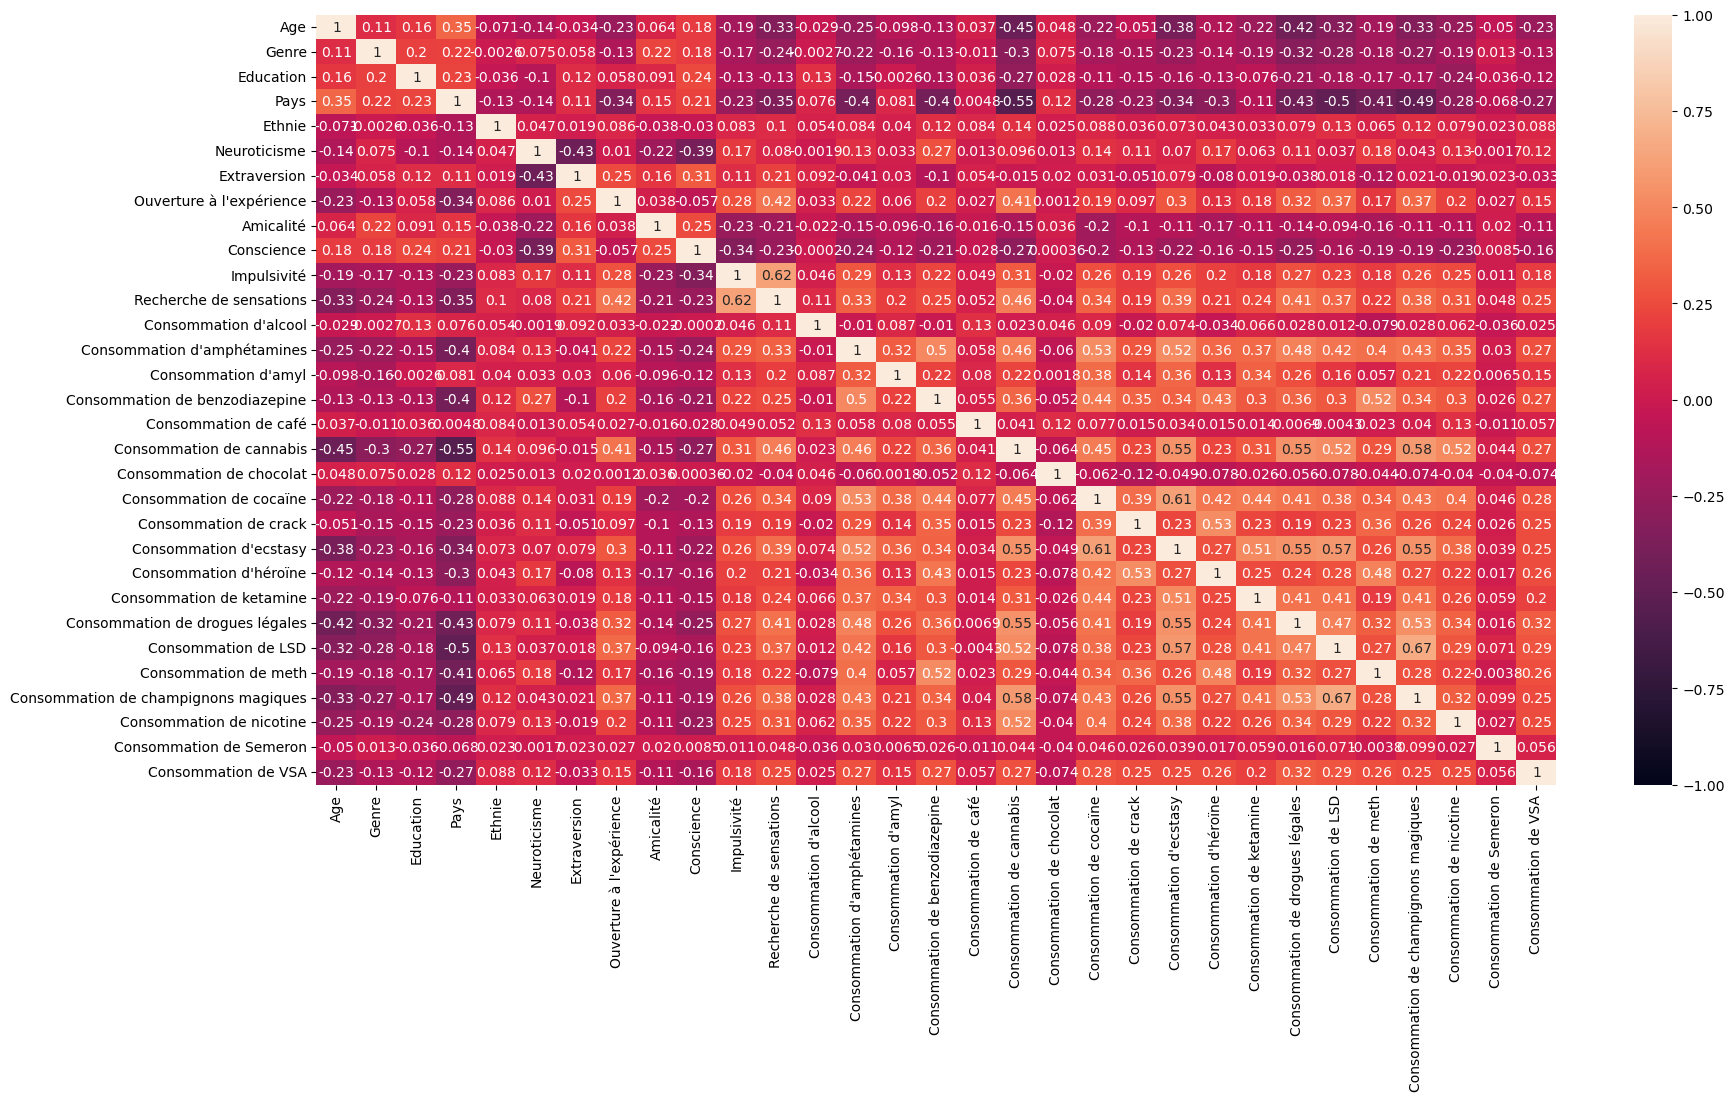

In [11]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

Before starting the study we can see the correlation between all the data, this can give us ideas on the future data we will want to study. As you can see there is a strong correlation between people who consume certain drugs and certain characteristics.

# Data Visualization

We decided first to display simple data such as the distribution of age, sex, ethnicity, countries...

In [12]:
def plot_proportion_bar(dataset, column):
    # Calculer la proportion de la population par tranche d'âge
    proportion_par_tranche = dataset[column].value_counts(normalize=True).sort_index()

    # Définir des couleurs pour chaque tranche d'âge
    couleurs = ['skyblue', 'lightcoral', 'gold', 'lightgreen', 'lightsalmon', 'mediumpurple']

    # Créer le graphique à barres avec des couleurs différentes pour chaque barre
    plt.figure(figsize=(10, 6))
    proportion_par_tranche.plot(kind='bar', color=couleurs)
    plt.title(f'Proportion de la population par {column}', fontsize=16)
    plt.xlabel(f'{column}', fontsize=14)
    plt.ylabel('Proportion de la population', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


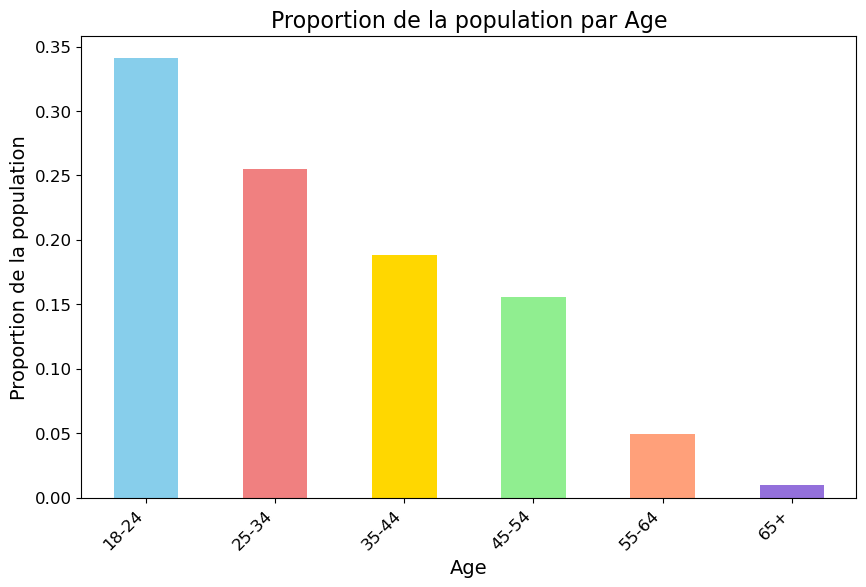

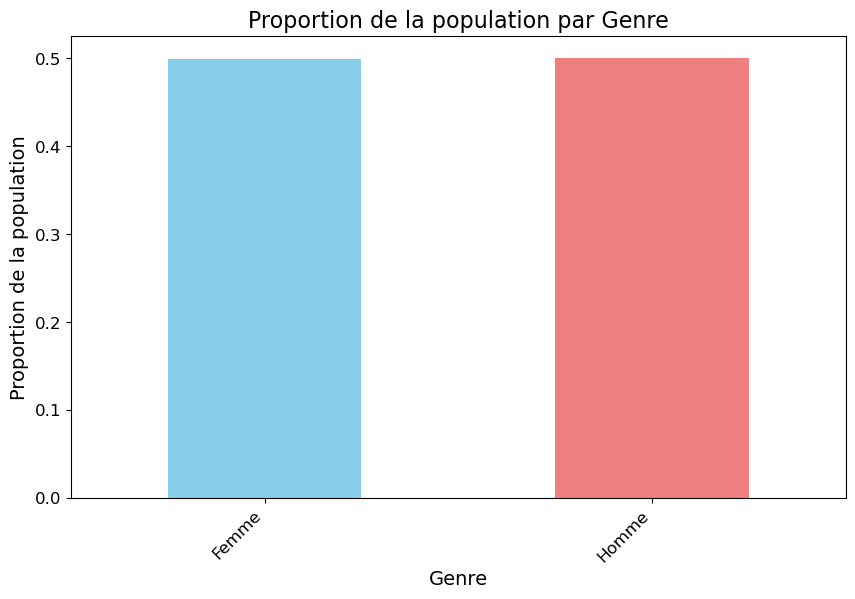

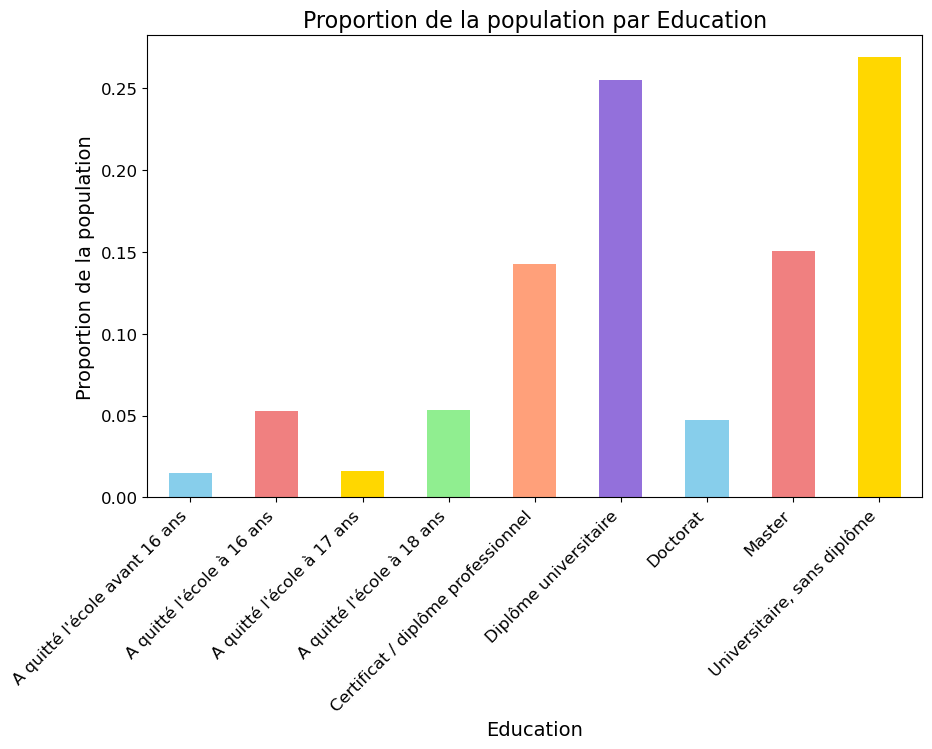

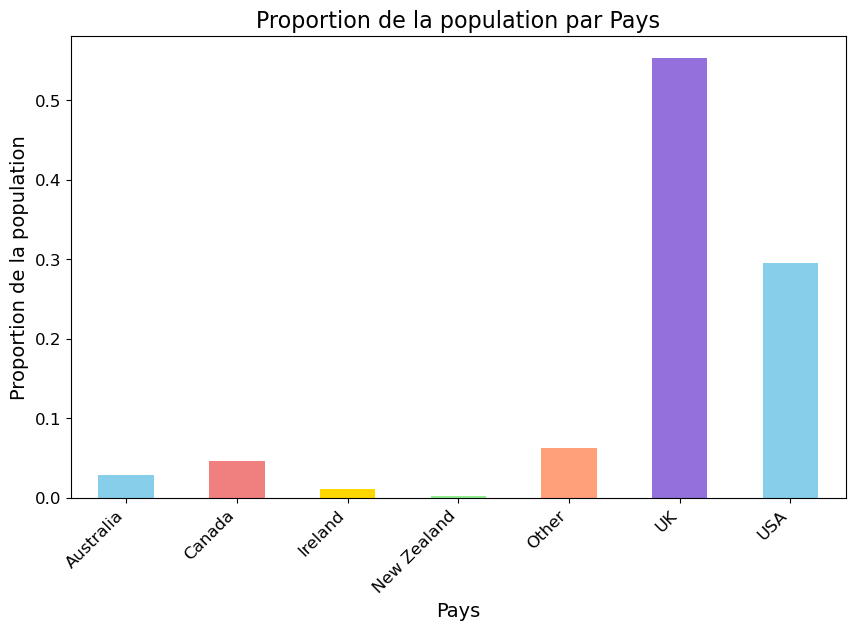

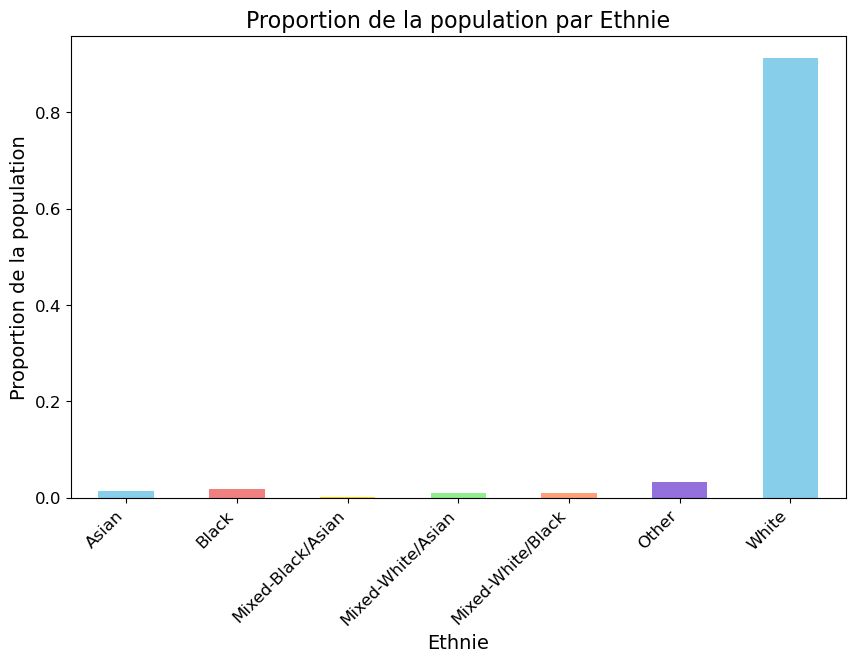

In [13]:
for test in info_col :
    plot_proportion_bar(pers_data,test)

From this information we can already determine several pieces of information.

- The age distribution is very well distributed.
- There are as many women as men.
- We can notice that the "white" category for ethnicity and the "Uk" and "USA" countries is not very balanced (more than 90% are "white"). We can then assume that the initial data collection was mainly carried out in the US and UK which skews our future study a bit. We will therefore avoid taking these information into account for the rest of the study.

In [14]:
def plot_proportion_bar2(dataset, column_a, column_b):
    proportion_par_colonne = dataset.groupby(column_b)[column_a].mean().sort_index()

    # Créer le graphique à barres
    plt.figure(figsize=(10, 6))
    proportion_par_colonne.plot(kind='bar', color='skyblue')
    plt.title(f'Moyenne de {column_a} par {column_b}', fontsize=16)
    plt.xlabel(f'{column_b}', fontsize=14)
    plt.ylabel(f'Moyenne de {column_a}', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [15]:
def plot_pie_chart(dataset, column):
    # Calculer les pourcentages pour chaque catégorie
    pourcentages = dataset[column].value_counts(normalize=True) * 100
    
    fig = px.pie(pourcentages, values=pourcentages, names=pourcentages.index, 
                 title=f'Répartition de la population par {column}',
                 color_discrete_sequence=px.colors.qualitative.Set3)
    
    # Afficher le diagramme 
    fig.show()

In [16]:
plot_pie_chart(pers_data, 'Age')

We also decided to display certain consumption in relation to certain characteristics.

Such as age and the consumption of a certain drug. Where we can notice that certain drugs are particularly consumed by young people, while others are consumed by all age groups.

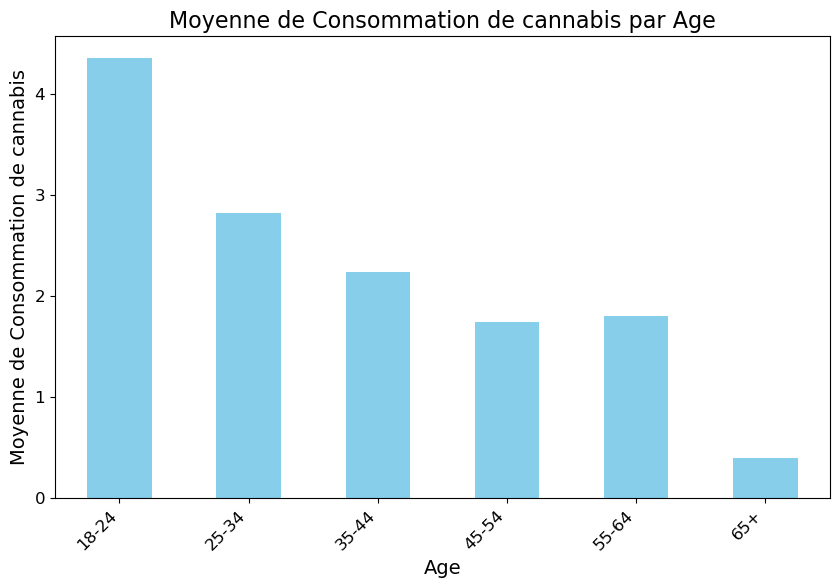

In [17]:
plot_proportion_bar2(pers_data, 'Consommation de cannabis', 'Age')

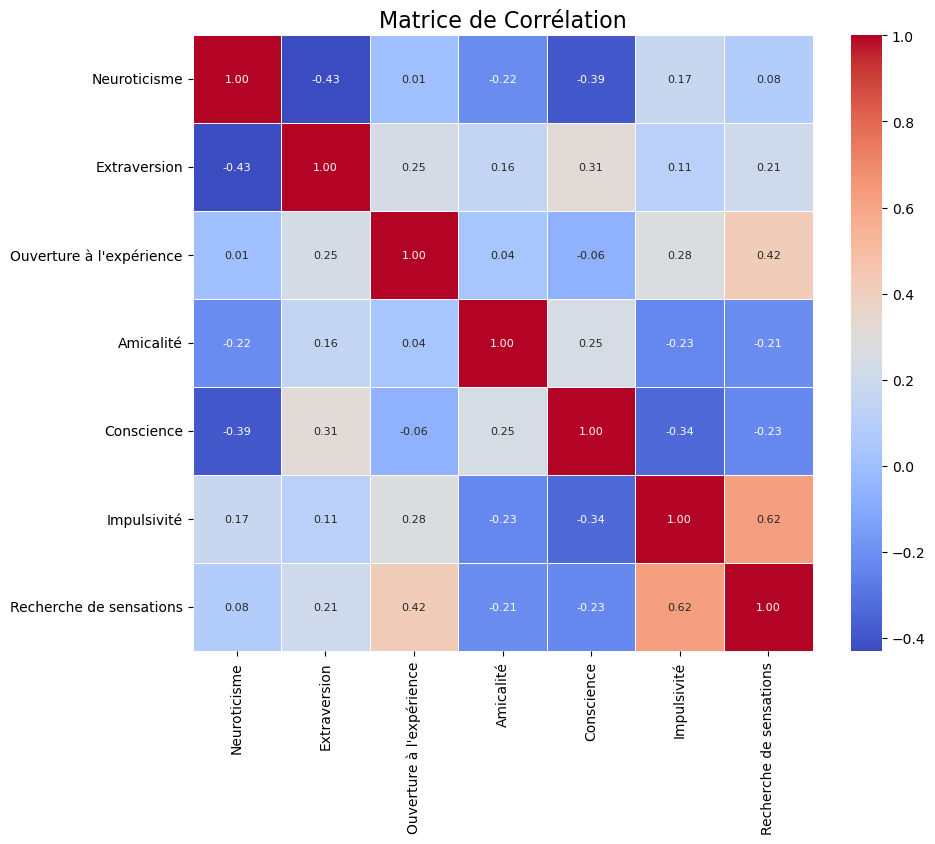

In [18]:
def plot_correlation_matrix(dataset, columns):
    # Sélectionner les colonnes spécifiées dans la liste
    selected_columns = dataset[columns]

    correlation_matrix = selected_columns.corr()
    plt.figure(figsize=(10, 8))
    
    # Utiliser des chiffres avec moins de décimales et ajuster la taille des chiffres
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", annot_kws={"size": 8})
    
    plt.title('Matrice de Corrélation', fontsize=16)
    plt.show()
    
plot_correlation_matrix(data, caract_col)

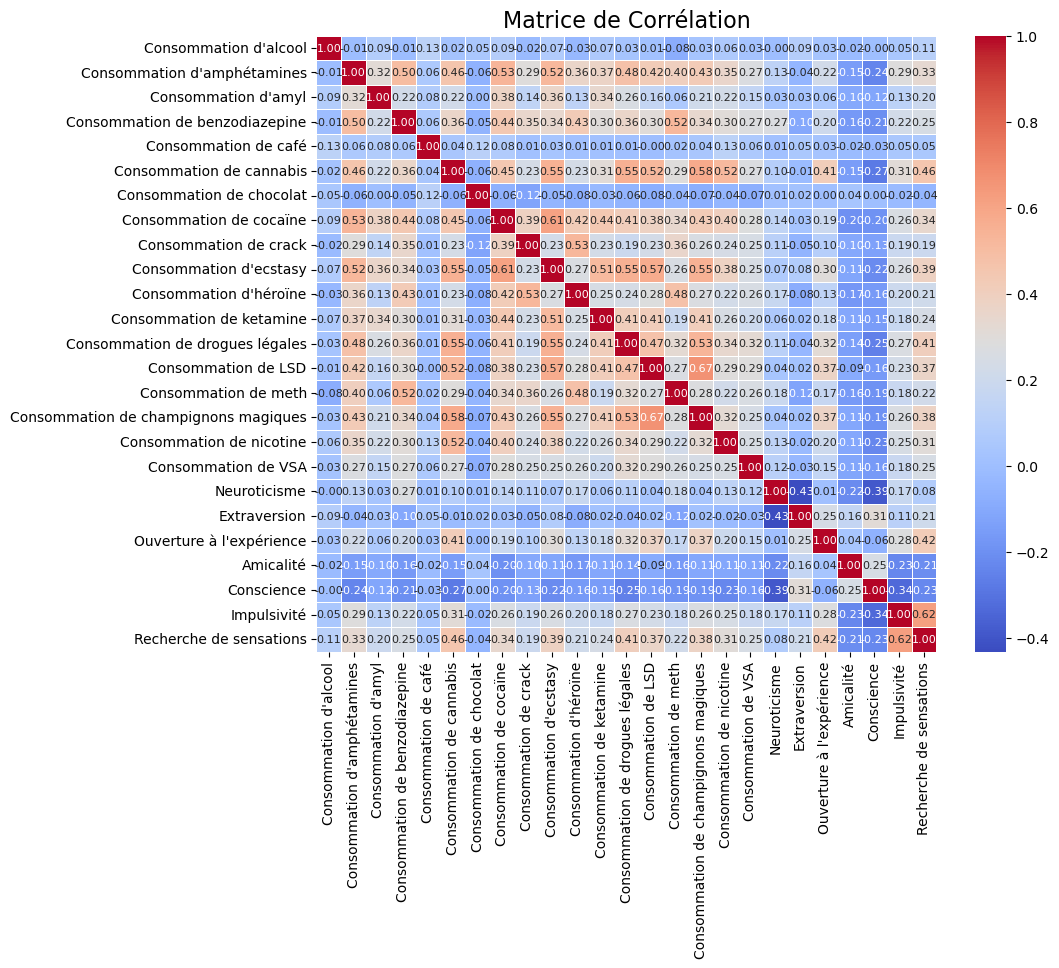

In [19]:
colonne1 = drogues_col + caract_col
plot_correlation_matrix(data, colonne1)

We also displayed correlation matrices between certain types of information. Such as drug consumption and others. We can notice some interesting correlations such as the consumption of crack with the consumption of ecstasy. Or on certain characters, we notice a great correlation between sensation seeking and impulsiveness. This allows us to already make some hypotheses.

<module 'matplotlib.pyplot' from 'C:\\Users\\33635\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

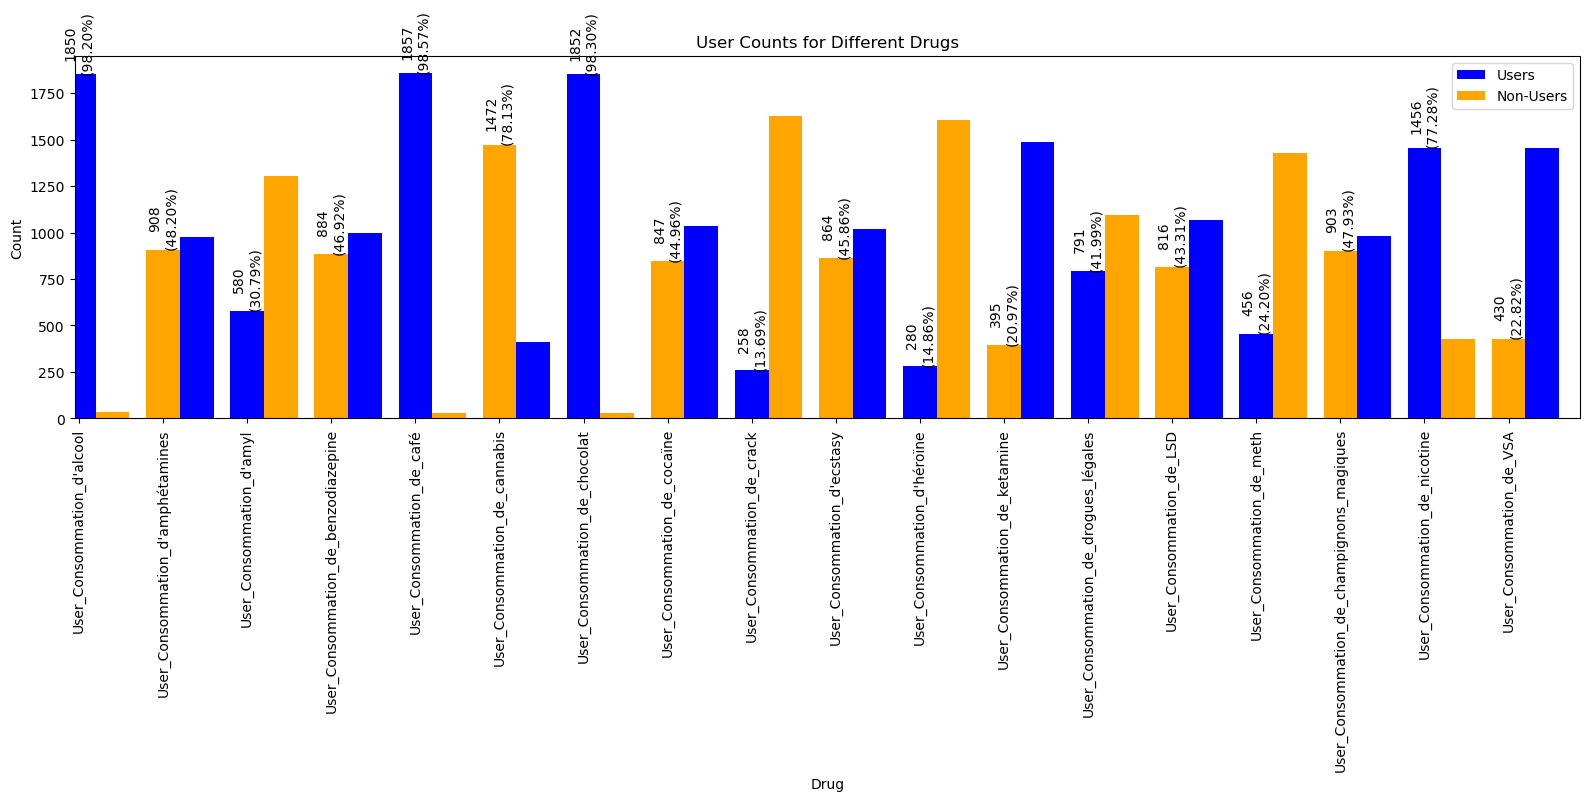

In [20]:
def plot_user_counts_per_drug_combined(data, drogues_col):
    # Create a copy of the DataFrame to avoid modifying the original
    copy_df = data.copy()

    # Set up the plot
    fig, ax = plt.subplots(figsize=(16, 8))

    # Loop through each drug and create a countplot
    for drogue_col in drogues_col:
        # Create a new binary column
        copy_df['User_' + drogue_col.replace(" ", "_")] = (copy_df[drogue_col] > 0).astype(int)

    # Combine all the user count columns into a single DataFrame
    user_counts_df = copy_df[[col for col in copy_df.columns if 'User_' in col]]

    # Calculate total count for each user type (user and non-user)
    total_counts = user_counts_df.sum()

    # Calculate percentage for each user type
    percentages = total_counts / len(copy_df) * 100

    # Plot grouped bar chart
    user_counts_df.sum().plot(kind='bar', color=['blue', 'orange'], ax=ax, position=0.5, width=0.4, label='Users')
    (1 - user_counts_df).sum().plot(kind='bar', color=['orange', 'blue'], ax=ax, position=-0.5, width=0.4, label='Non-Users')

    # Annotate with percentages (rotated 90 degrees)
    for i, count in enumerate(total_counts):
        ax.text(i, count + 1, f"{count}\n({percentages[i]:.2f}%)", ha='center', va='bottom', rotation=90)

    # Set labels and title
    ax.set_ylabel('Count')
    ax.set_xlabel('Drug')
    ax.set_title('User Counts for Different Drugs')

    # Add legend
    ax.legend()

    plt.tight_layout()  # Adjust layout to prevent overlapping
    return plt


plot_user_counts_per_drug_combined(data,drogues_col)


Finally, we were able to make a visual of the number of consumers in % for each drug.

This gives us ideas of analysis to do. We can for example notice that the majority wins on the consumption of coffee, chocolate or nicotine. But we can also notice that a majority has already tried Cannabis, this is perhaps due to the fact that some have already been able to try at least once in their life. The other drugs considered as hard have a very relevant user rate.

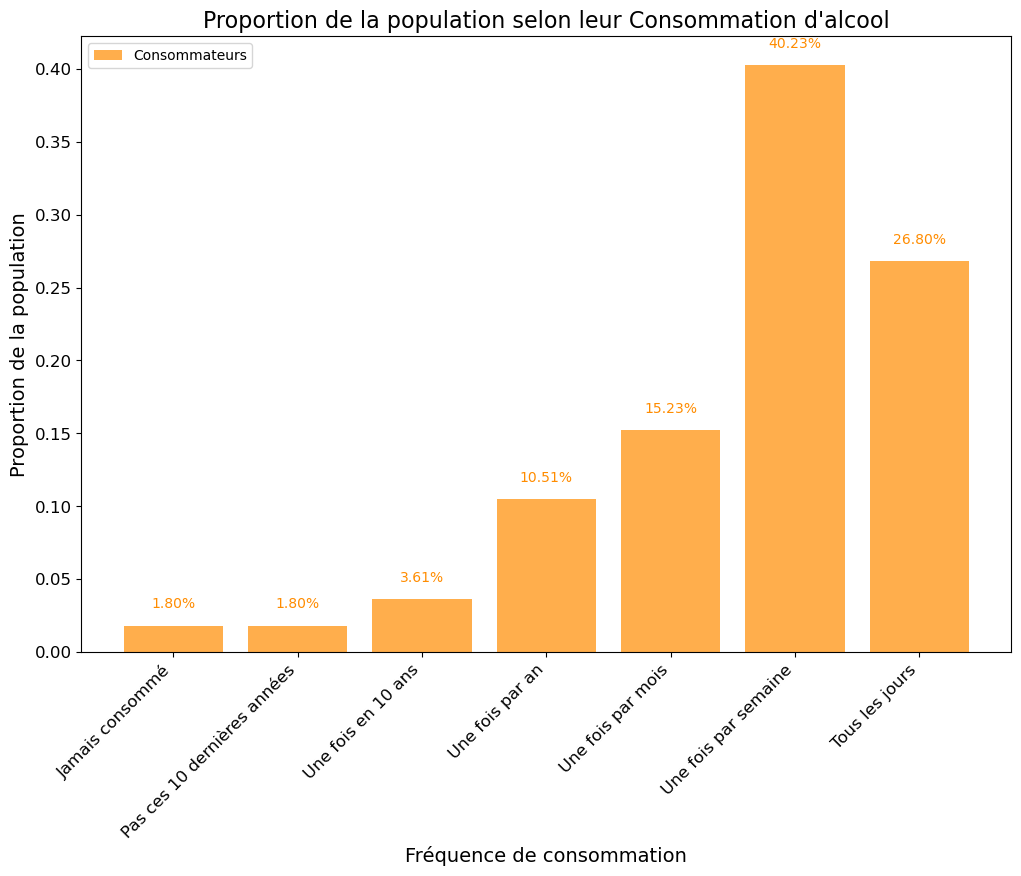

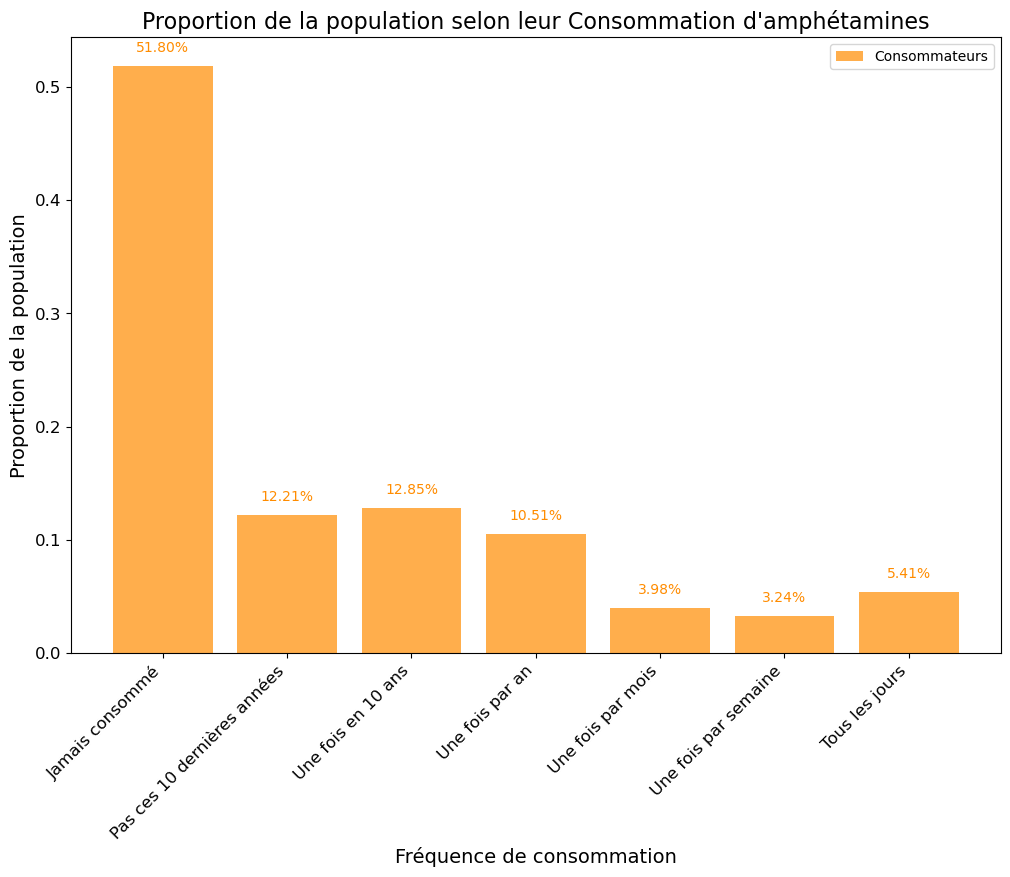

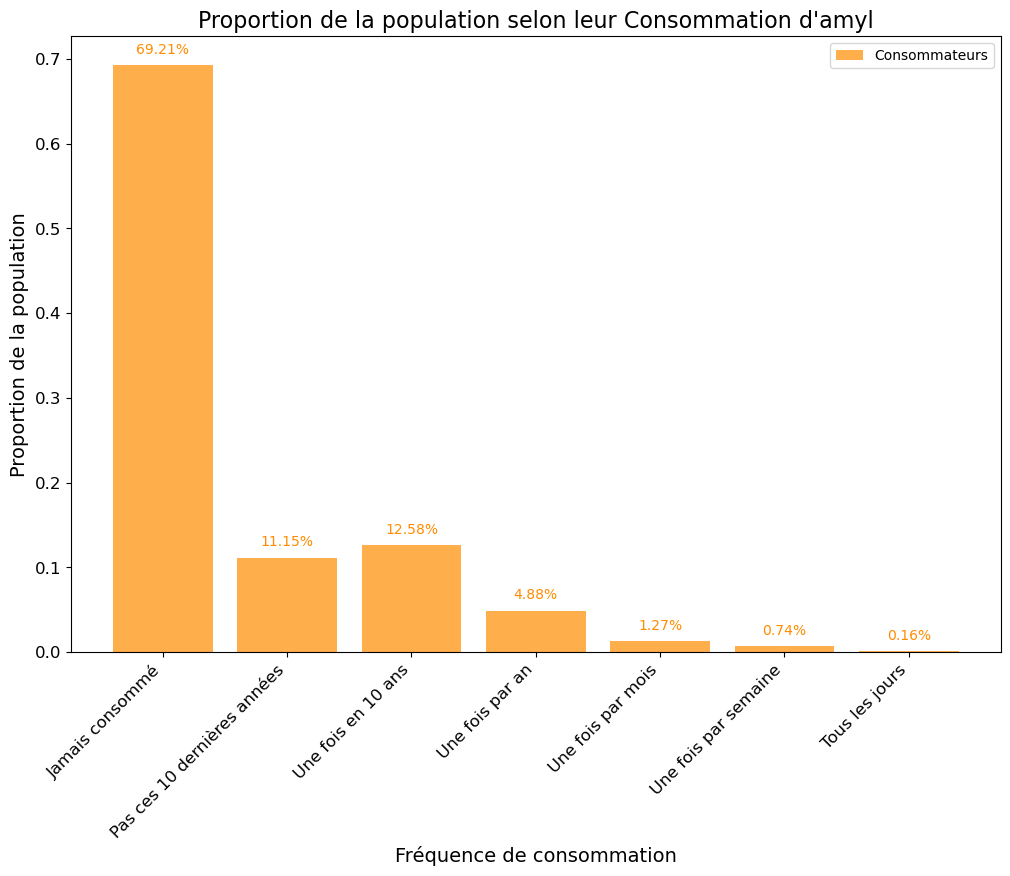

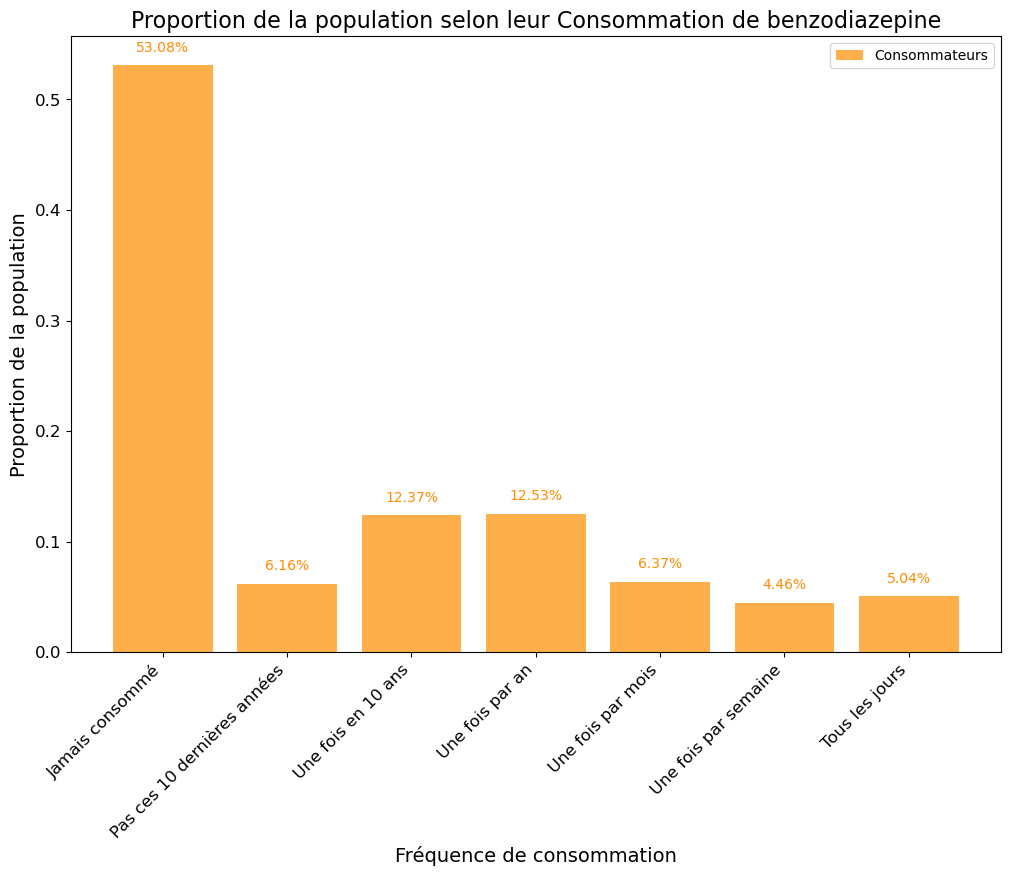

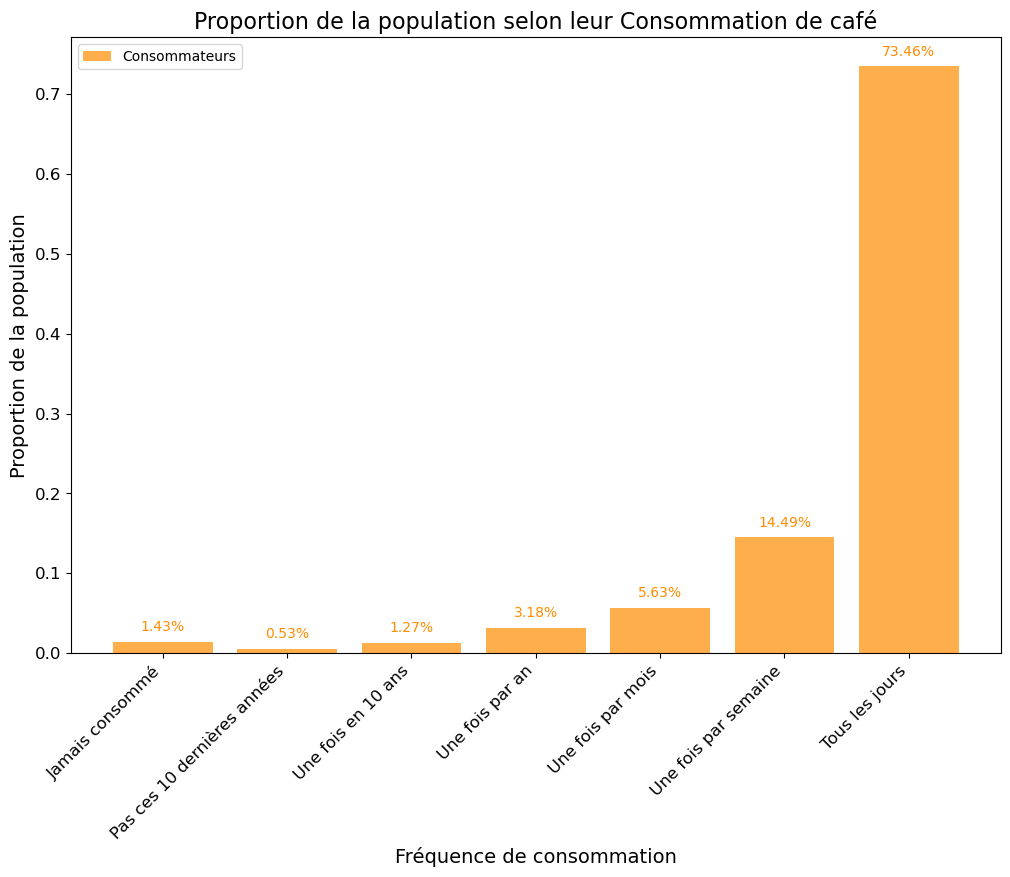

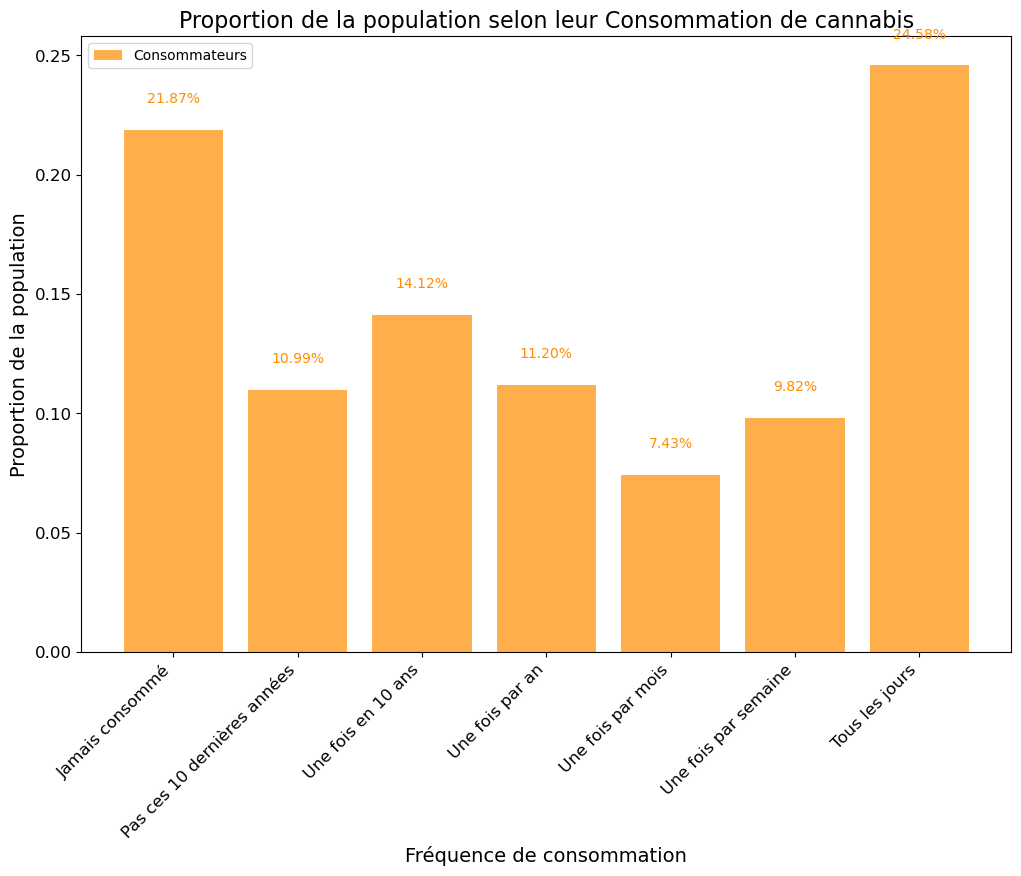

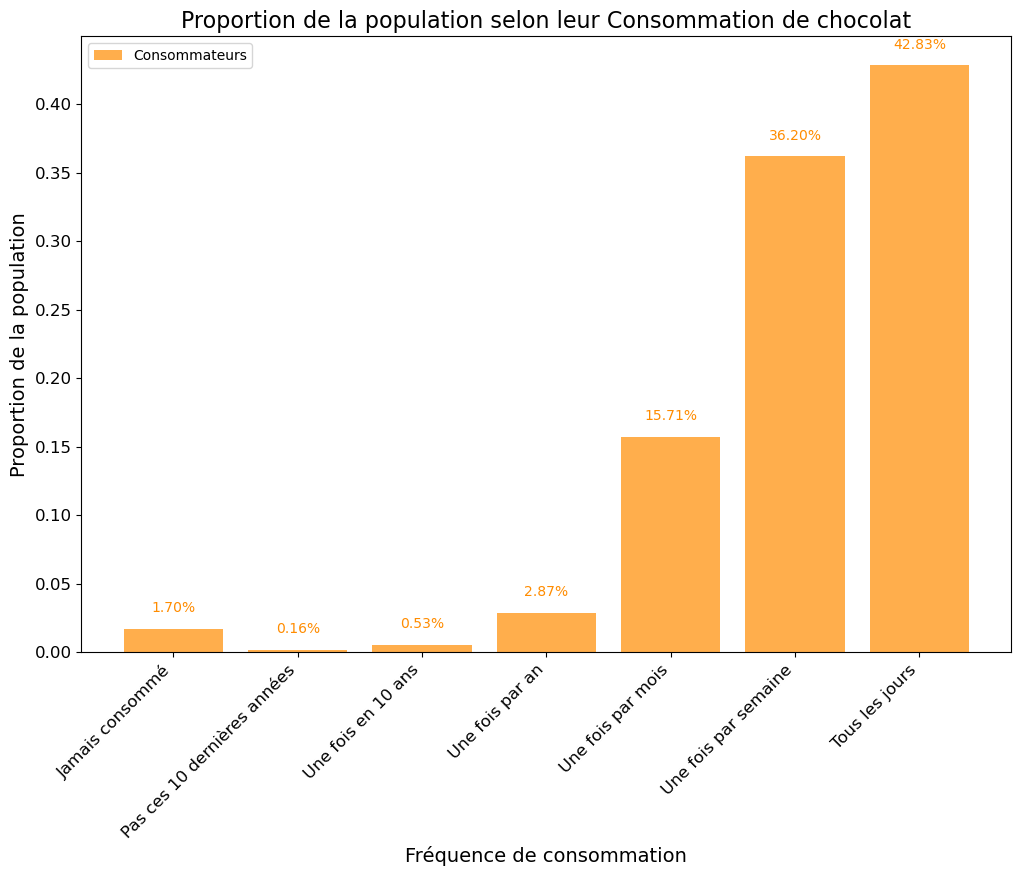

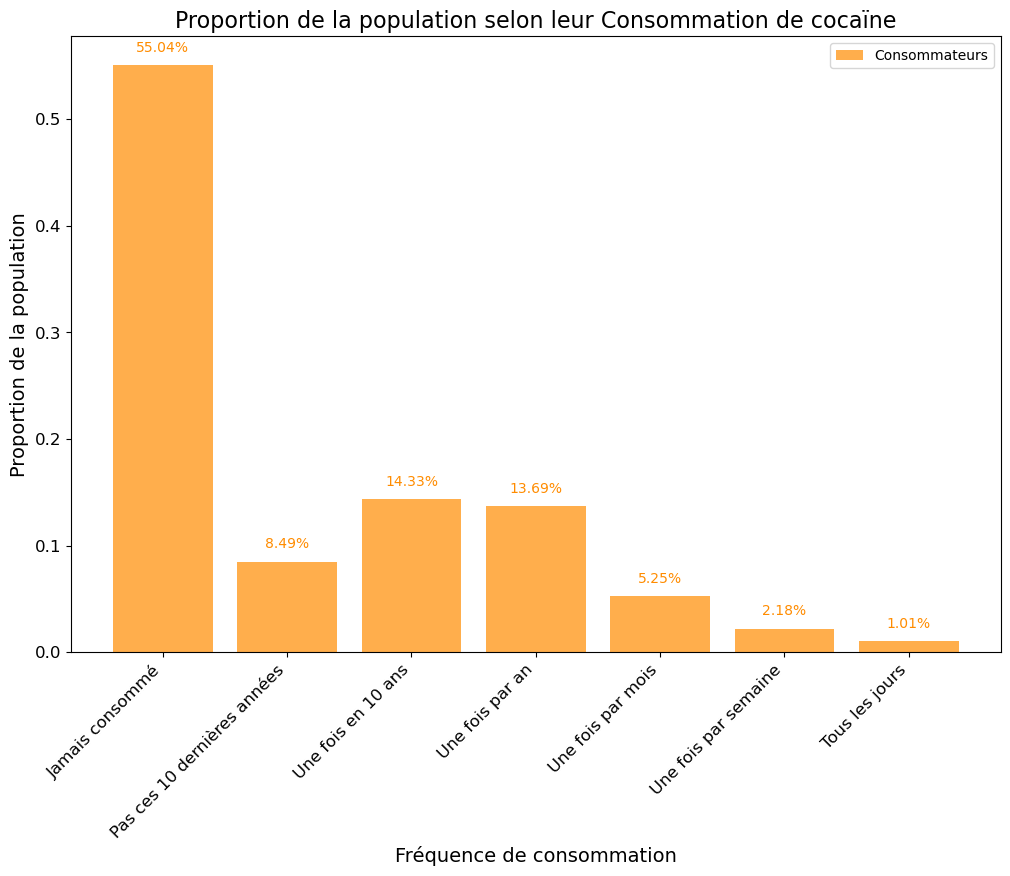

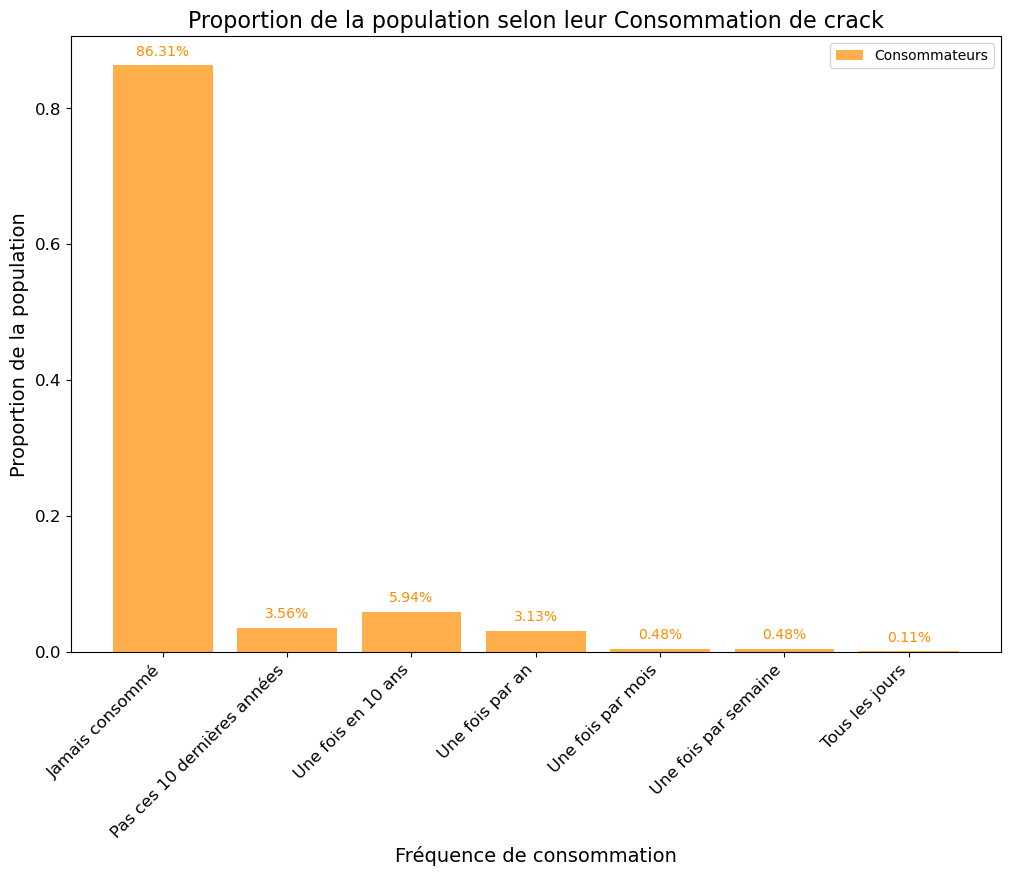

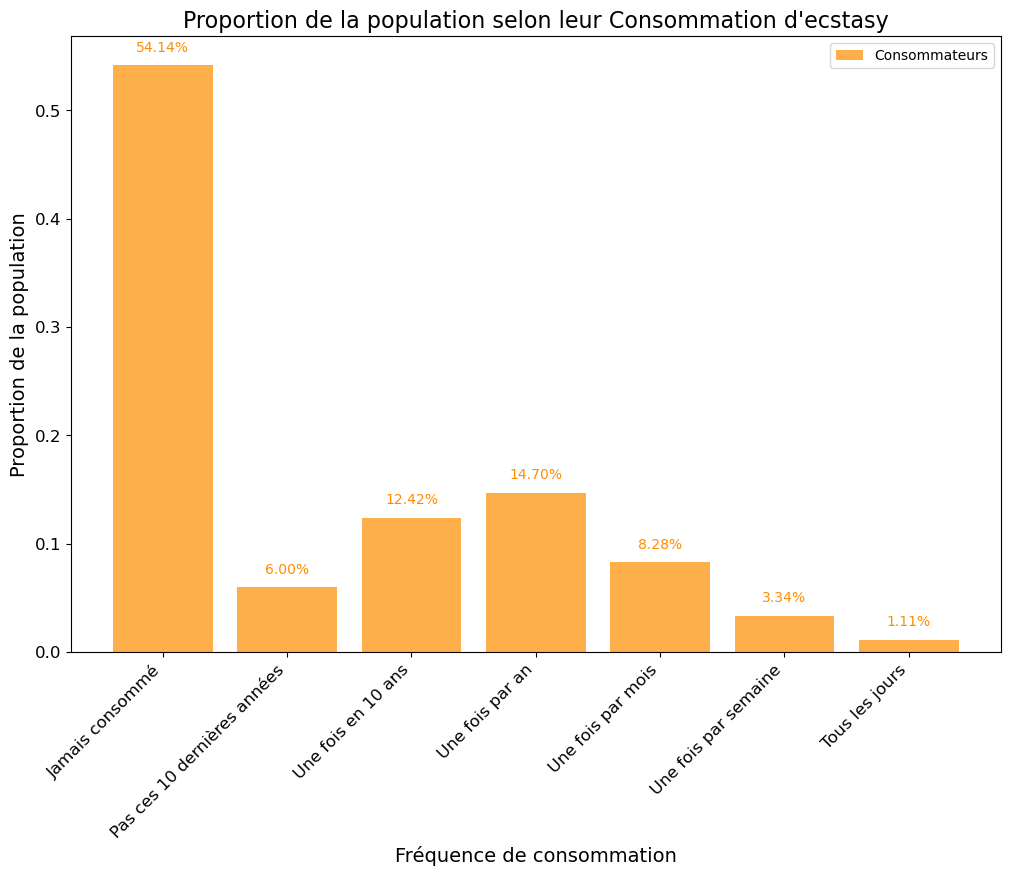

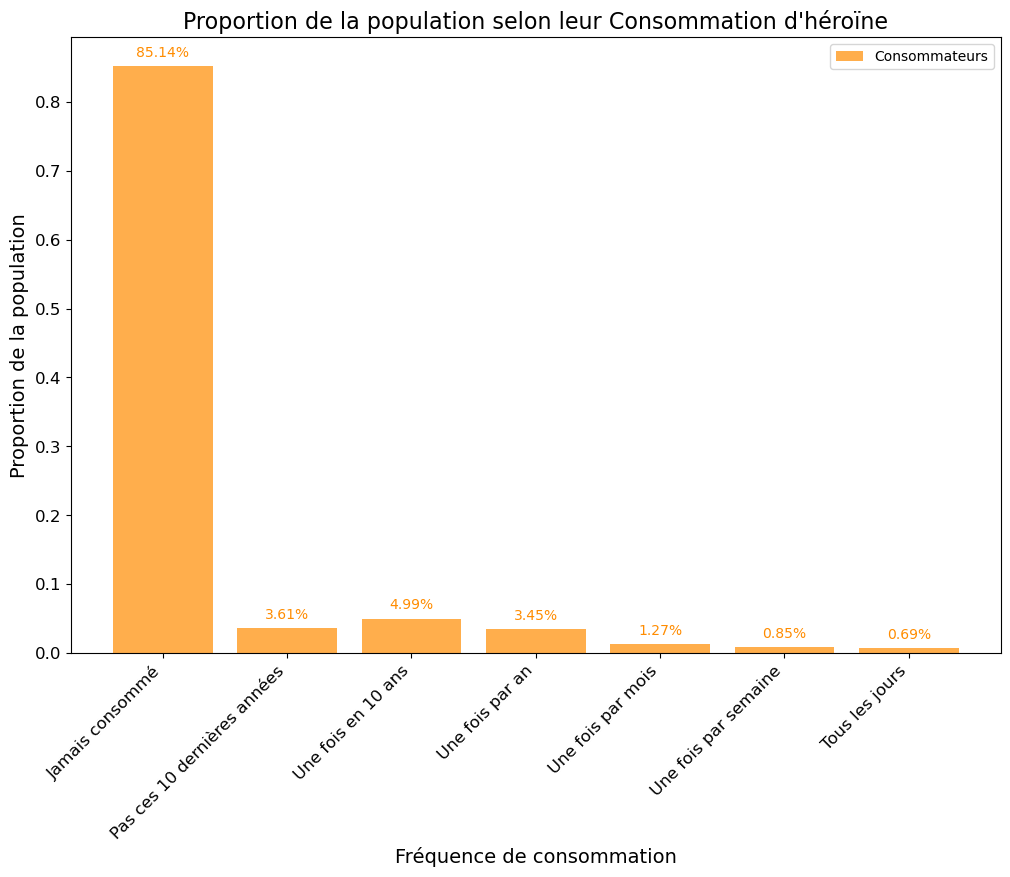

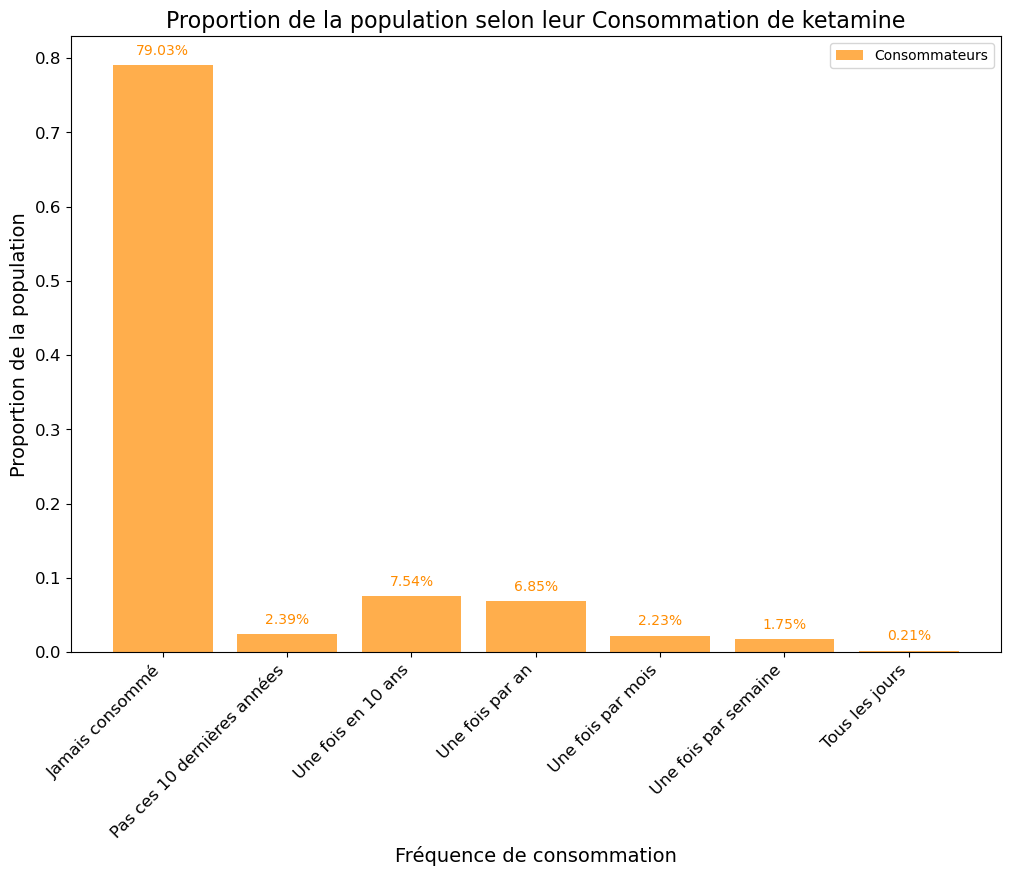

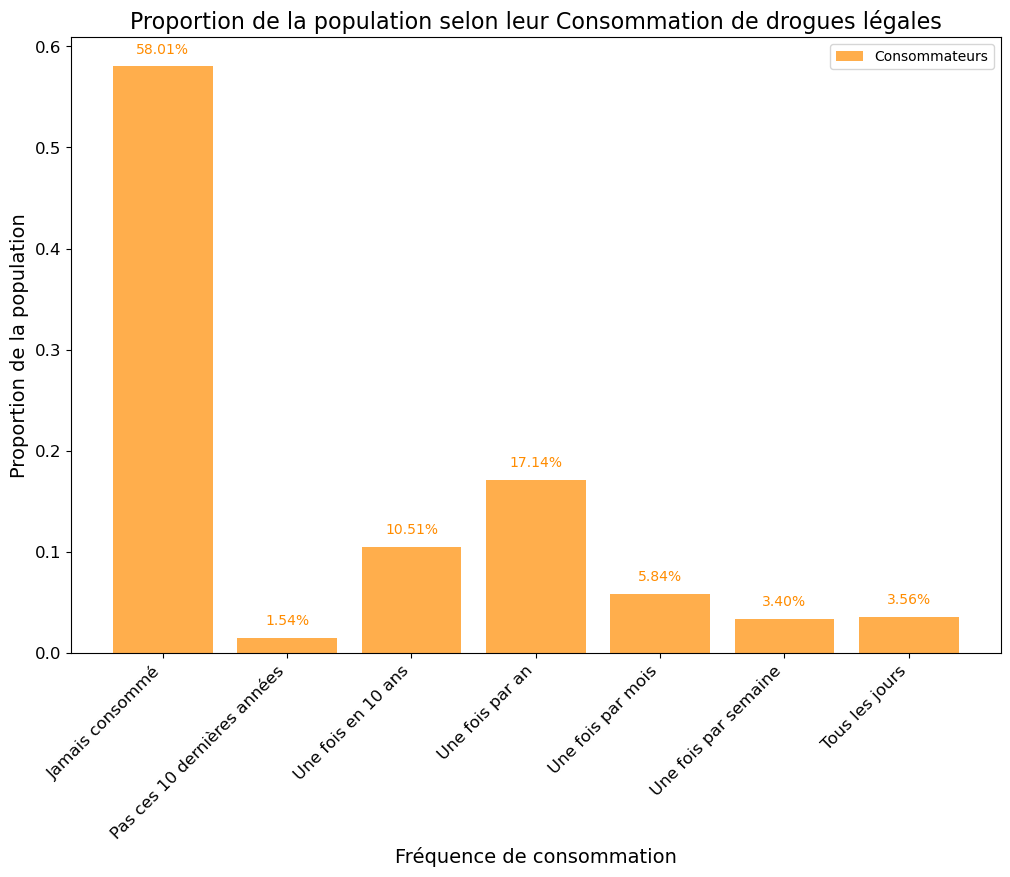

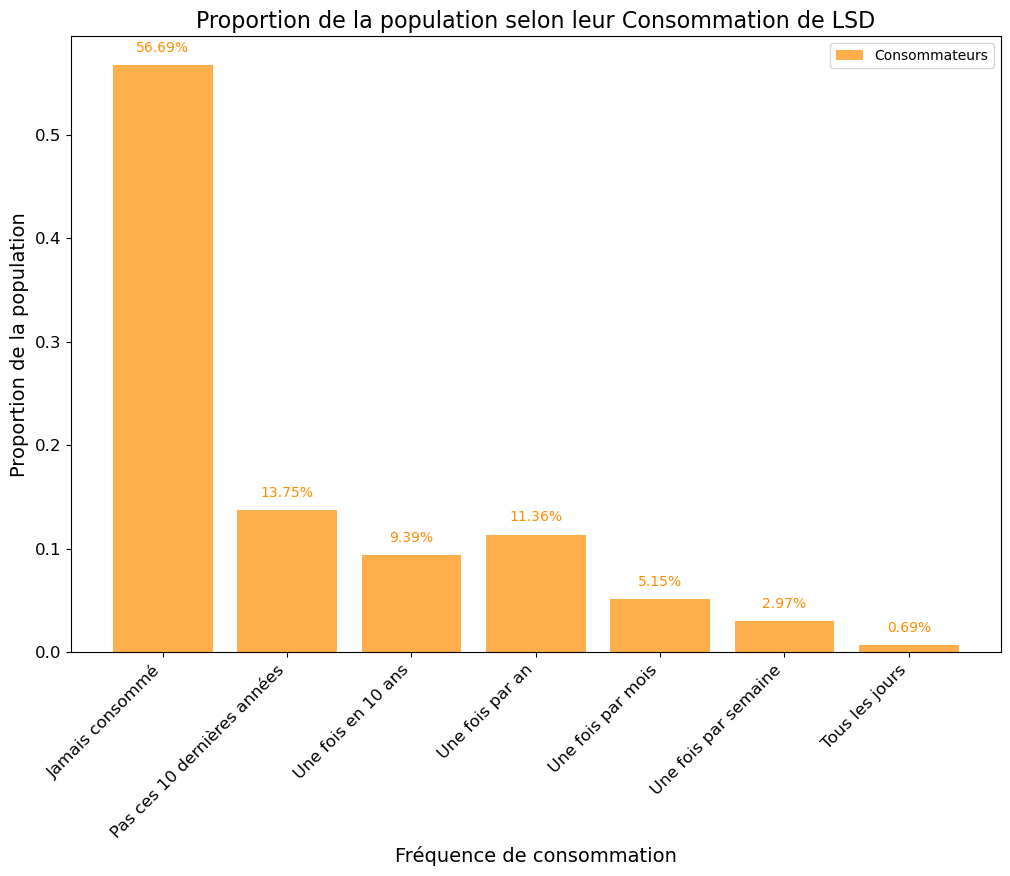

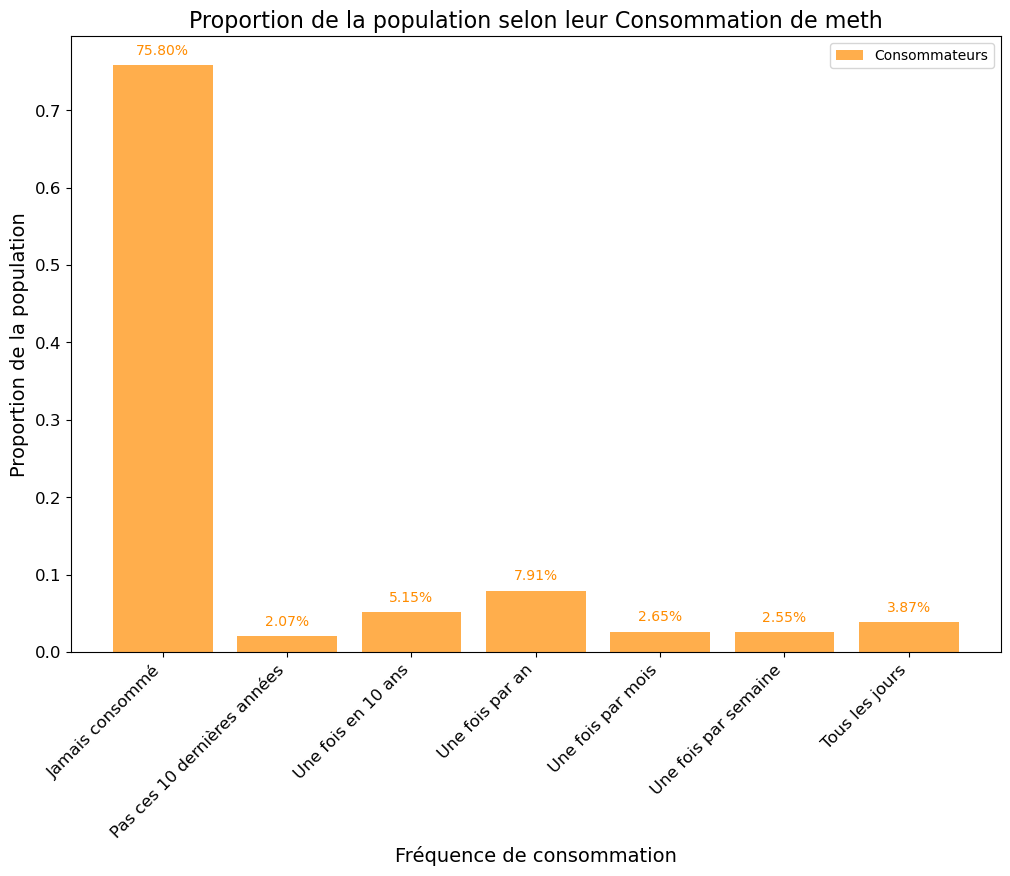

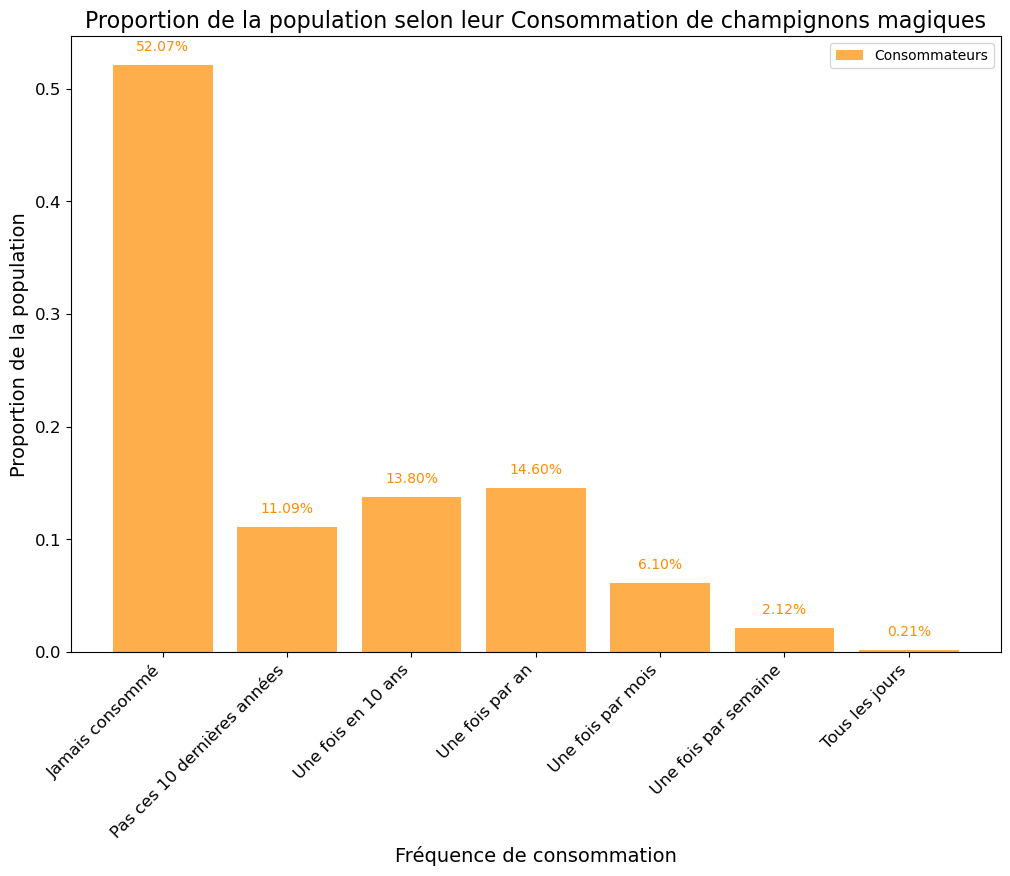

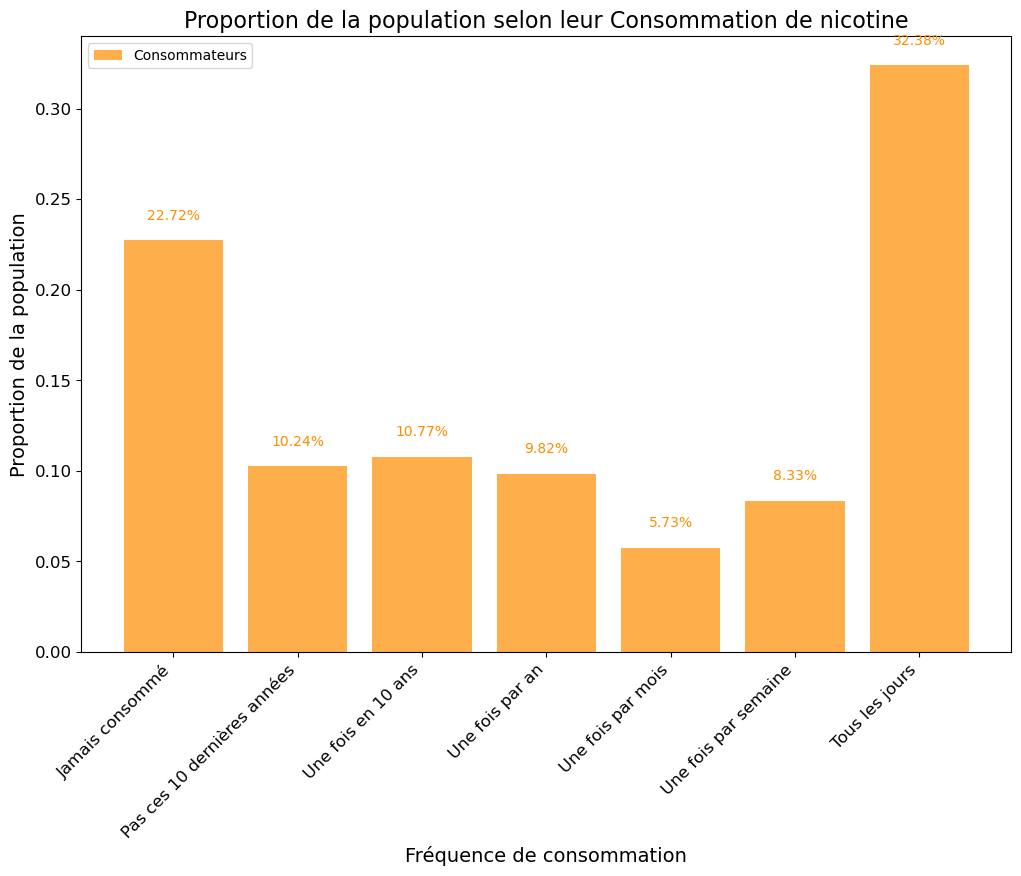

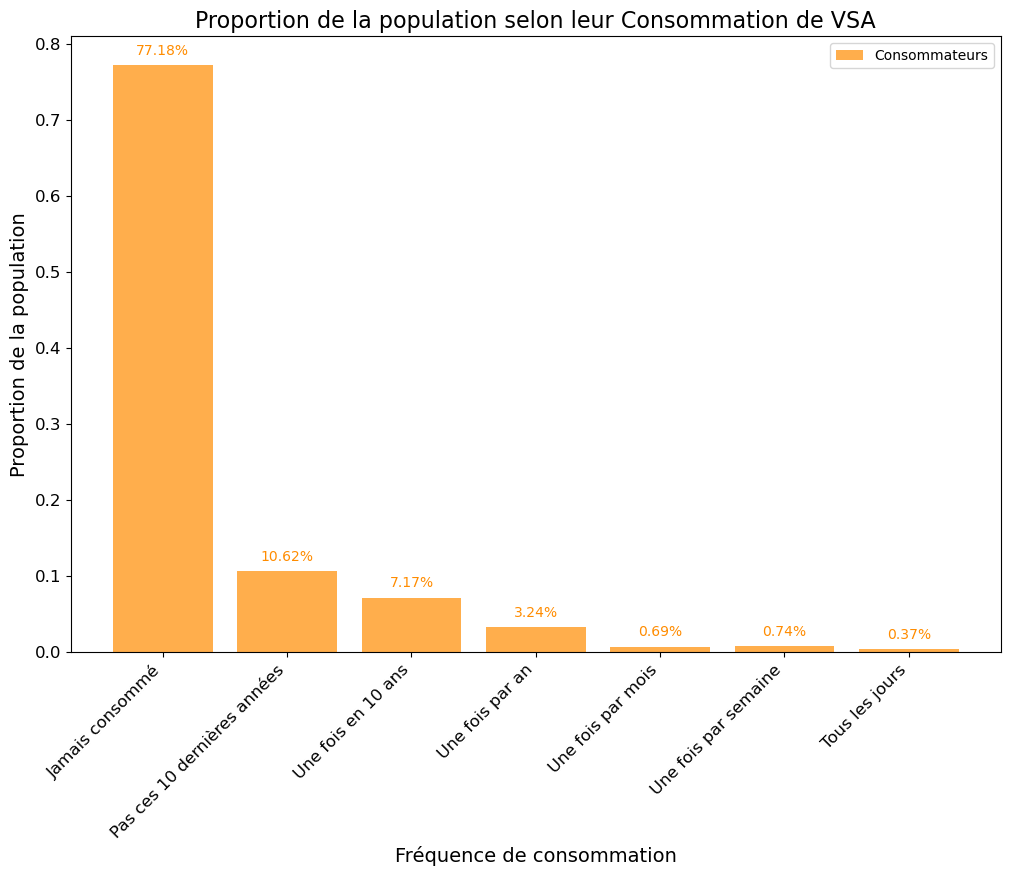

In [21]:
def plot_proportion_bar_drug(dataset, column):
    consommateurs = dataset[dataset[column] >= 0]
    
    proportion_consommateurs = consommateurs[column].value_counts(normalize=True).sort_index()

    couleurs = ['skyblue', 'lightcoral', 'gold', 'lightgreen', 'lightsalmon', 'mediumpurple']

    plt.figure(figsize=(12, 8))

    bars = plt.bar(proportion_consommateurs.index, proportion_consommateurs, color='darkorange', label='Consommateurs', alpha=0.7)

    for i, value in enumerate(proportion_consommateurs):
        plt.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom', fontsize=10, color='darkorange')

    plt.title(f'Proportion de la population selon leur {column}', fontsize=16)
    plt.xlabel('Fréquence de consommation', fontsize=14)
    plt.ylabel('Proportion de la population', fontsize=14)
    
    labels = ['Jamais consommé', 'Pas ces 10 dernières années', 'Une fois en 10 ans', 'Une fois par an', 'Une fois par mois', 'Une fois par semaine', 'Tous les jours']
    
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=12)

    plt.yticks(fontsize=12)
    plt.legend()
    return plt

for dr in drogues_col:
    plot_proportion_bar_drug(data,dr)

# Data Analysis

Here we have done more thorough analysis where we can determine the effect of certain drugs.

We started by analyzing the characteristic of each category in relation to the drug studied. We can compare this graph with a "non-consumer" of the same drug. For example, if we choose cannabis as a drug, we can compare the average character of consumers against those who do not consume it.

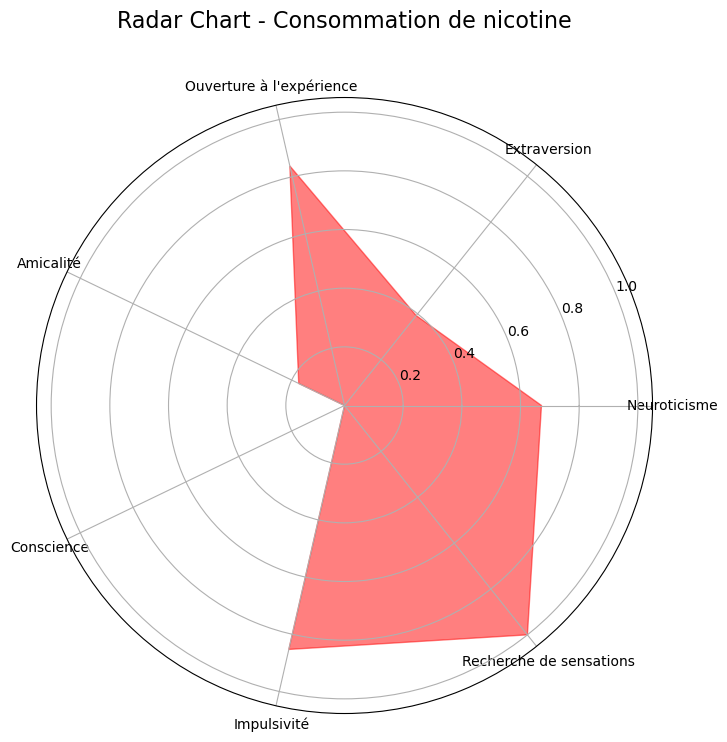

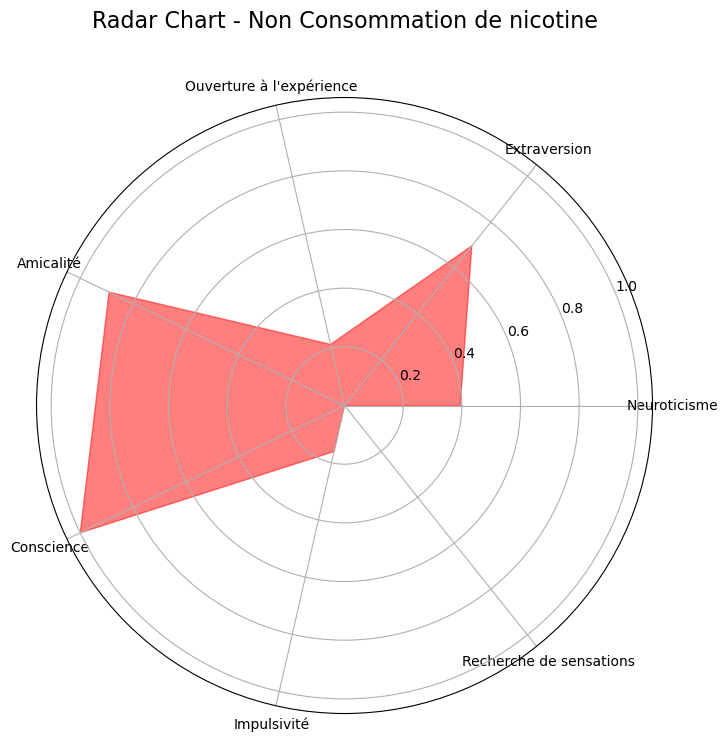

In [22]:
def radar_chart_consommation_drogue(data, drogue, consommateurs=True):
    
    # Filtrer les lignes en fonction de la consommation
    if consommateurs:
        data_filtre = data[data[drogue] > 1]
    else:
        data_filtre = data[data[drogue] < 1]

    # Calculer la moyenne pour chaque caractéristique
    moyenne_caracteristiques = data_filtre[caract_col].mean()

    # Normaliser les valeurs pour les utiliser dans la radar chart
    moyenne_normalisee = (moyenne_caracteristiques - moyenne_caracteristiques.min()) / (moyenne_caracteristiques.max() - moyenne_caracteristiques.min())

    # Créer un tableau de valeurs pour chaque angle de la radar chart
    angles = np.linspace(0, 2 * np.pi, len(caract_col), endpoint=False)

    # Ajouter la première valeur à la fin pour fermer le cercle
    moyenne_normalisee = np.concatenate((moyenne_normalisee, [moyenne_normalisee[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    # Créer le graphique en radar avec une zone de couleur rouge
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, moyenne_normalisee, color='red', alpha=0.5)

    # Ajouter des étiquettes pour chaque caractéristique
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(caract_col)

    # Ajouter un titre en fonction de la consommation
    titre = f'Radar Chart - {drogue}' if consommateurs else f'Radar Chart - Non {drogue}'
    plt.title(titre, size=16, y=1.1)

    # Afficher le graphique
    plt.show()


radar_chart_consommation_drogue(data, 'Consommation de nicotine', consommateurs=True)
radar_chart_consommation_drogue(data, 'Consommation de nicotine', consommateurs=False)

We then obtain two "Radar" graphs ideal for visualizing several variables.

We can notice that for whatever drug given in entry the consumer and non-consumer end up having opposing characters. For powerful and addictive drugs, we find a lot of negative character that comes out.

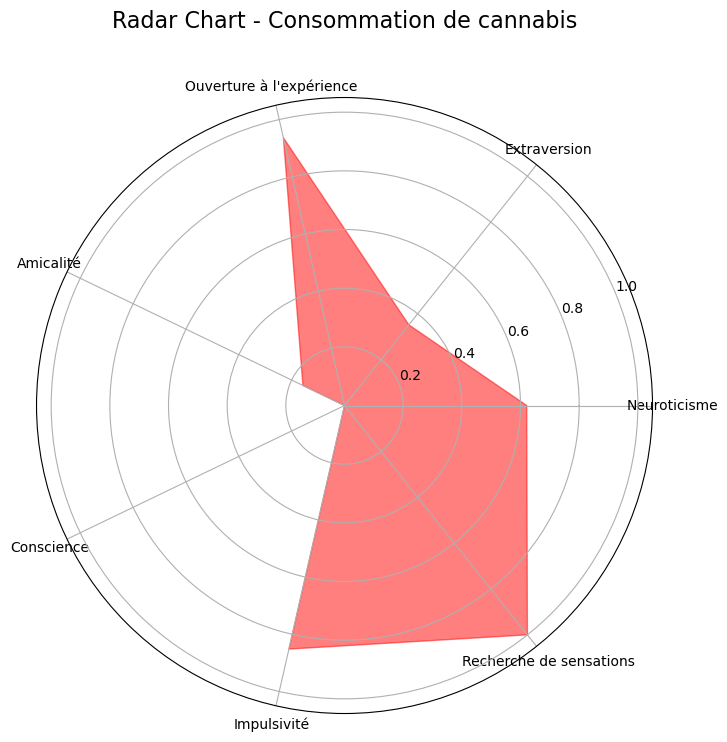

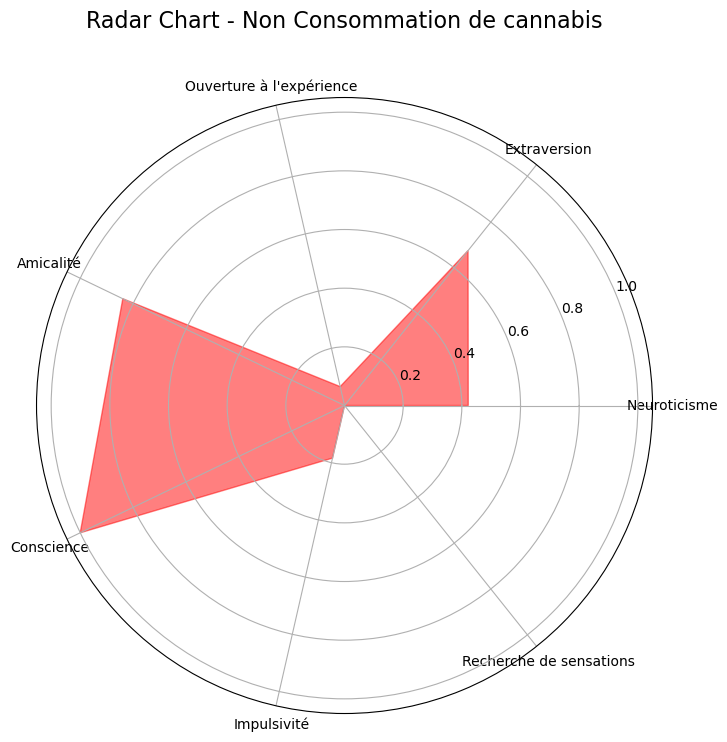

In [23]:
radar_chart_consommation_drogue(data, 'Consommation de cannabis', consommateurs=True)
radar_chart_consommation_drogue(data, 'Consommation de cannabis', consommateurs=False)

The second graph represents the consumption trends by age category.

Here we can visualize some coherences that we can find for example in cannabis where here we can see a very high consumption at young age then which dissipates little by little.

We can notice that other drugs such as cocaine which are not necessarily accessible to students are particularly found in the age range 34-64.

In [24]:
def plot_drug_use_trends_by_age_pers_data(dataset, drug_name):
    
    if drug_name not in dataset.columns:
        raise ValueError("Le nom de la drogue spécifié n'est pas valide.")
    grouped_data = dataset.groupby("Age")[drug_name].value_counts().unstack().fillna(0)

    # Création d'un graphique en ligne
    fig = px.line(
        grouped_data, 
        title=f"Tendances de {drug_name} par catégories d'âge"
    )
    
    fig.update_xaxes(title_text='Catégorie d\'âge')
    fig.update_yaxes(title_text=f'Nombre de consommateurs de {drug_name}')
    
    return fig

for drug in drogues_illégales:
    fig=plot_drug_use_trends_by_age_pers_data(pers_data, drug)
    fig.show()



This graph represents the distribution of education levels according to drug consumption. This graph confirms theories put forward. We can also notice that for certain very addictive and very dependent drugs the level of study is low.

In [25]:
def plot_education_level_sunburst(dataset, drugs_list):

    # Filtrage des données pour inclure uniquement les colonnes nécessaires
    cols_to_use = ['Education'] + drugs_list
    filtered_data = dataset[cols_to_use]

    # Préparation des données pour le graphique sunburst
    sunburst_data = []
    for drug in drugs_list:
        for level, count in filtered_data['Education'][filtered_data[drug] > 0].value_counts().items():
            sunburst_data.append([drug, level, count])

    # Conversion en DataFrame
    sunburst_df = pd.DataFrame(sunburst_data, columns=['Drug', 'Education Level', 'Count'])
    fig = px.sunburst(
        sunburst_df, 
        path=['Drug', 'Education Level'], 
        values='Count',
        color='Count',
        title="Comparaison des niveaux d'éducation entre les consommateurs de différentes drogues"
    )

    return fig

#(exemple)
drugs_to_analyze = ["Consommation de cannabis", "Consommation de cocaïne", "Consommation d'alcool"]
plot_education_level_sunburst(pers_data, drugs_to_analyze)

In [26]:
def get_drug_combinations(dataset,drug_columns):
    def get_drug_combinations_at_level(dataset, level, drug_columns):

        # Filtrage du dataset pour inclure uniquement les individus avec une consommation de niveau spécifié
        filtered_data = dataset.copy()
        for drug in drug_columns:
            filtered_data[drug] = filtered_data[drug].apply(lambda x: 1 if x == level else 0)

        # Identification des combinaisons pour chaque individu
        filtered_data['Combinations'] = filtered_data[drug_columns].apply(
            lambda row: '-'.join(row.index[row == 1]) if row.sum() >= 2 else '', axis=1
        )
        filtered_data["Taux d'addiction"] = level

        # Filtrage pour exclure les lignes avec des combinaisons vides ou contenant une seule drogue
        filtered_data = filtered_data[filtered_data['Combinations'] != '']

        return filtered_data[['Combinations', "Taux d'addiction"]]



    all_levels_combinations = pd.DataFrame()

    # Boucle sur les niveaux de consommation de 1 à 6
    for level in range(2, 7):
        level_combinations = get_drug_combinations_at_level(dataset, level, drug_columns)
        all_levels_combinations = pd.concat([all_levels_combinations, level_combinations], ignore_index=True)

    # Filtrer pour ne conserver que les combinaisons présentes au moins deux fois
    all_levels_combinations = all_levels_combinations.groupby('Combinations').filter(lambda x: len(x) >= 2)

    return all_levels_combinations

# Exemple d'utilisation
all_levels_combinations = get_drug_combinations(pers_data, drogues_illégales)
all_levels_combinations.head() 

Combinations  Taux d'addiction
2   Consommation de cannabis-Consommation de cocaïne                 2
3  Consommation de cocaïne-Consommation de champi...                 2
4  Consommation d'amphétamines-Consommation d'amy...                 2
6  Consommation d'amphétamines-Consommation de ca...                 2
8  Consommation de benzodiazepine-Consommation de...                 2

Creation d'un dataset permettant de voir les combinaison de drogue et leur taux d'utilisation

In [27]:
def shorten_drug_names(combination, mapping):
    
    # Séparer la combinaison en drogues individuelles
    drugs = combination.split('-')
    
    # Remplacer chaque nom long par son équivalent court
    short_names = [mapping[drug] if drug in mapping else drug for drug in drugs]
    return '-'.join(short_names)

name_mapping = {
    "Consommation d'alcool": "alcool",
    "Consommation d'amphétamines": "amphétamines",
    "Consommation d'amyl": "amyl",
    "Consommation de benzodiazepine": "benzodiazepine",
    "Consommation de café": "café",
    "Consommation de cannabis": "cannabis",
    "Consommation de chocolat": "chocolat",
    "Consommation de cocaïne": "cocaïne",
    "Consommation de crack": "crack",
    "Consommation d'ecstasy": "ecstasy",
    "Consommation d'héroïne": "héroïne",
    "Consommation de ketamine": "ketamine",
    "Consommation de drogues légales": "drogues légales",
    "Consommation de LSD": "LSD",
    "Consommation de meth": "meth",
    "Consommation de champignons magiques": "champignons magiques",
    "Consommation de nicotine": "nicotine",
    "Consommation de Semeron": "Semeron",
    "Consommation de VSA": "VSA"
}

all_levels_combinations['Combinations'] = all_levels_combinations['Combinations'].apply(lambda x: shorten_drug_names(x, name_mapping))
all_levels_combinations.head()

Combinations  Taux d'addiction
2                cannabis-cocaïne                 2
3    cocaïne-champignons magiques                 2
4       amphétamines-amyl-cocaïne                 2
6   amphétamines-cannabis-cocaïne                 2
8  benzodiazepine-drogues légales                 2

This graph represents the frequency of the most present drug combinations. This can then confirm certain correlations that we were able to make at the beginning of the study. We can see here that Benzodiazepine is very present with cannabis with a daily addiction rate, followed by amphetamine and cannabis.

In [28]:
def frequence_combinaison(all_levels_combinations):
    freq_combinations = all_levels_combinations.groupby(['Combinations', 'Taux d\'addiction']).size().reset_index(name='Frequency')

    # Trier les combinaisons par fréquence
    sorted_combinations = freq_combinations.sort_values(by='Frequency', ascending=False)
    sorted_combinations=sorted_combinations.head(20)
    
    # Création du graphique en barres
    fig = px.bar(
        sorted_combinations, 
        x='Combinations', 
        y='Frequency', 
        color='Taux d\'addiction', 
        title='Fréquence des Combinaisons les Plus Présentes par Niveau d\'Addiction'
    )
    fig.update_layout(xaxis_title="Combinaisons", yaxis_title="Fréquence", xaxis={'categoryorder':'total descending'})
    return fig

frequence_combinaison(all_levels_combinations)

In [29]:
def profil_drogue_radar(pers_data,drug_columns,personality_traits):
    average_profiles = pd.DataFrame()

    # Boucle pour calculer les moyennes pour chaque drogue
    for drug in drug_columns:
        # Filtrer les consommateurs réguliers
        regular_consumers = pers_data[pers_data[drug] >= 4]

        # Calculer la moyenne des traits de personnalité
        if not regular_consumers.empty:
            average_profile = regular_consumers[personality_traits].mean()
            average_profile['Drug'] = drug  # Ajouter le nom de la drogue
            average_profiles = average_profiles.append(average_profile, ignore_index=True)

    # Créer un graphique radar pour chaque drogue
    fig = go.Figure()

    # Ajouter une ligne pour chaque drogue
    for drug in average_profiles['Drug'].unique():
        drug_data = average_profiles[average_profiles['Drug'] == drug]
        fig.add_trace(go.Scatterpolar(
            r=drug_data[personality_traits].values[0],
            theta=personality_traits,
            fill='toself',
            name=drug
        ))

    # Améliorer la mise en page
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]  # Assurez-vous que cette plage correspond à votre échelle de données
            )),
        showlegend=True,
        title='Comparaison des profils de personnalité moyens des consommateurs réguliers de différentes drogues'
    )
    return fig

profil_drogue_radar(pers_data,drogues_col,caract_col)

C:\Users\33635\AppData\Local\Temp\ipykernel_44584\2699548781.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\33635\AppData\Local\Temp\ipykernel_44584\2699548781.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\33635\AppData\Local\Temp\ipykernel_44584\2699548781.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\33635\AppData\Local\Temp\ipykernel_44584\2699548781.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\33635\AppData\Local\Temp\ipykernel_44584\2699548781.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

The last graph joins the first one but we can more easily compare the traits of each drug.

# Machine Learning

As in all the project we have coded in an encapsulated way to easily reuse our code, it is the same for machine learning. The majority of our functions are reusable for each model and each chosen X and Y.

For this part we decided to try to use machine learning to answer this question: "Can we determine how often a person is likely to consume a drug according to their characteristics and information?"

As first we add all the import needed

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')


In [31]:
def prediction_training(features,target,model):
    
    # Séparation en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Création et entraînement du modèle
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    
    # Autres métriques de performance
    report = classification_report(y_test, y_pred)
    print(report)
    
    
    sns.distplot(y_pred,hist=False,color='r',label = 'Predicted Values')
    sns.distplot(y_test,hist=False,color='b',label = 'Actual Values')
    plt.title('Actual vs predicted values',fontsize =16)
    plt.xlabel('Values',fontsize=12)
    plt.ylabel('Frequency',fontsize =12)
    plt.legend(loc='upper left',fontsize=13)
    plt.show()
    return y_pred



For this we have separated the dataset into training 80%/20% and to start we have used the SVC because very good for the Management of High Dimensions.

Accuracy: 40.58%
              precision    recall  f1-score   support

           0       0.48      0.83      0.61        84
           1       0.33      0.15      0.21        40
           2       0.31      0.07      0.12        67
           3       0.10      0.02      0.04        42
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        33
           6       0.38      0.82      0.52        87

    accuracy                           0.41       377
   macro avg       0.23      0.27      0.21       377
weighted avg       0.30      0.41      0.30       377



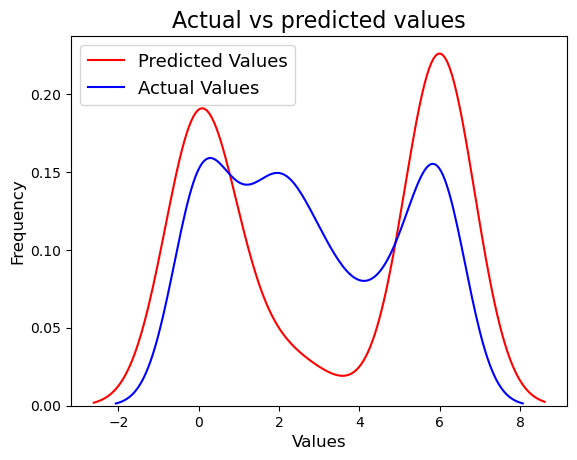

array([0, 6, 6, 6, 6, 6, 2, 0, 2, 6, 3, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 0,
       6, 0, 0, 6, 0, 6, 0, 6, 6, 6, 0, 0, 6, 6, 0, 0, 6, 1, 0, 6, 6, 6,
       6, 6, 6, 0, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 3, 6, 1, 0, 6, 6, 6, 6,
       0, 0, 6, 2, 6, 0, 1, 6, 6, 6, 6, 6, 6, 1, 6, 6, 3, 0, 6, 6, 0, 0,
       0, 0, 6, 0, 1, 0, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 0, 2, 6, 0, 0, 6,
       6, 6, 6, 6, 2, 6, 1, 0, 0, 0, 0, 6, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0,
       6, 0, 0, 6, 0, 6, 6, 1, 0, 6, 0, 0, 0, 0, 0, 1, 6, 6, 6, 2, 0, 0,
       6, 6, 6, 0, 2, 6, 6, 6, 6, 0, 6, 0, 0, 2, 6, 1, 6, 6, 3, 0, 6, 0,
       6, 0, 2, 6, 6, 0, 6, 6, 6, 6, 0, 6, 0, 6, 0, 6, 0, 0, 6, 0, 0, 2,
       0, 0, 0, 6, 6, 6, 0, 2, 0, 6, 6, 1, 0, 6, 0, 0, 0, 3, 6, 0, 0, 6,
       0, 0, 6, 0, 2, 6, 0, 0, 6, 0, 6, 0, 6, 3, 0, 0, 6, 3, 6, 6, 6, 0,
       0, 2, 0, 6, 6, 6, 0, 6, 0, 0, 0, 6, 0, 0, 6, 6, 0, 6, 6, 6, 6, 0,
       6, 6, 2, 0, 6, 6, 6, 5, 6, 6, 6, 0, 0, 6, 6, 0, 6, 0, 0, 0, 0, 6,
       1, 6, 2, 6, 6, 0, 1, 6, 0, 0, 6, 6, 6, 0, 0,

In [32]:
# Sélection des caractéristiques
features = data[['Age','Genre', 'Education','Neuroticisme', 'Extraversion', 'Ouverture à l\'expérience', 'Amicalité', 'Conscience', 'Impulsivité', 'Recherche de sensations']]  # Ajoutez ici d'autres caractéristiques pertinentes
target = data['Consommation de cannabis']
prediction_training(features,target,SVC())

As one can imagine the result is not at the rendezvous from the start.

We then tried to use other models that could better adapt to our data such as the DecisionTreeClassifier (for its **Non-linearity** indeed it can capture non-linear relationships between features) and the RandomForestClassifier (for precision) but also the Knn but the latter did not succeed.

Here are our results:

 Support Vector Machines statistique :
Accuracy: 40.58%
              precision    recall  f1-score   support

           0       0.48      0.83      0.61        84
           1       0.33      0.15      0.21        40
           2       0.31      0.07      0.12        67
           3       0.10      0.02      0.04        42
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        33
           6       0.38      0.82      0.52        87

    accuracy                           0.41       377
   macro avg       0.23      0.27      0.21       377
weighted avg       0.30      0.41      0.30       377



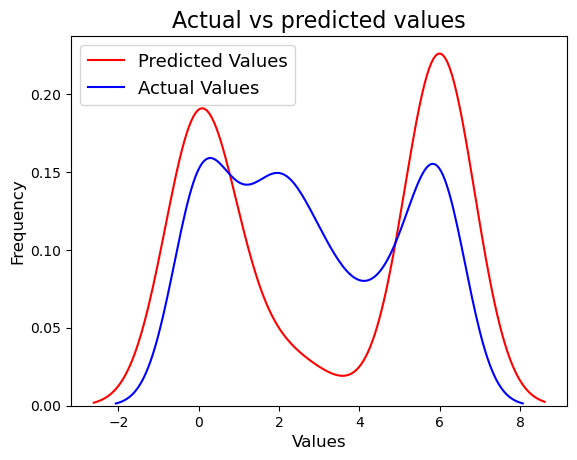

 Decision Tree Classifier statistique :
Accuracy: 28.38%
              precision    recall  f1-score   support

           0       0.40      0.39      0.40        84
           1       0.26      0.28      0.27        40
           2       0.28      0.25      0.27        67
           3       0.15      0.17      0.16        42
           4       0.21      0.33      0.25        24
           5       0.23      0.21      0.22        33
           6       0.32      0.28      0.30        87

    accuracy                           0.28       377
   macro avg       0.26      0.27      0.27       377
weighted avg       0.29      0.28      0.29       377



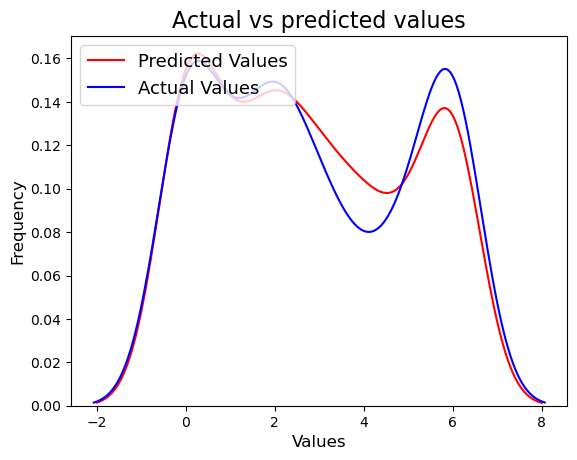

Random Forest Classifier statistique :
Accuracy: 39.26%
              precision    recall  f1-score   support

           0       0.48      0.69      0.56        84
           1       0.32      0.25      0.28        40
           2       0.29      0.18      0.22        67
           3       0.17      0.10      0.12        42
           4       0.29      0.08      0.13        24
           5       0.40      0.12      0.19        33
           6       0.41      0.67      0.50        87

    accuracy                           0.39       377
   macro avg       0.34      0.30      0.29       377
weighted avg       0.36      0.39      0.35       377



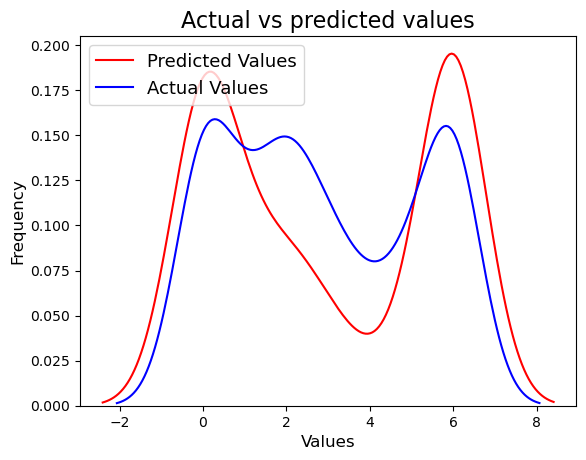

In [33]:
models = { ' Support Vector Machines': SVC(),
            ' Decision Tree Classifier': DecisionTreeClassifier(),
            'Random Forest Classifier': RandomForestClassifier(),}


features = data[['Age','Genre', 'Education','Neuroticisme', 'Extraversion', 'Ouverture à l\'expérience', 'Amicalité', 'Conscience', 'Impulsivité', 'Recherche de sensations']]  # Ajoutez ici d'autres caractéristiques pertinentes
target = data['Consommation de cannabis']

for name, model in models.items():
    print(name + ' statistique :')
    prediction_training(features,target,model)
    

As expected, the SVC remains the most efficient for our dataset.

We therefore tried the use of Hyper-parameter which will allow us to refine our model. For this we used the Hyper-parameters of the SVC, we judged that it is the best model for our study. This one is composed of several parameters such as the "C" which represents the regularization parameter, "gamma" the kernel coefficient and finally "Kernel" which represents the type of kernel. There are other parameters, but the more we add the longer our code will be for not necessarily a good result.

To apply the Hyper-parameter we used the GridSearchCV algorithm which is an exhaustive search technique used in machine learning to select the best set of parameters, it tests all possible combinations of specified hyperparameters in a grid. This allows you to find the combination that gives the best performance for a given model on a specific dataset.

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs paramètres :  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.42      0.83      0.56        84
           1       0.10      0.03      0.04        40
           2       0.00      0.00      0.00        67
           3       0.17      0.02      0.04        42
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        33
           6       0.37      0.79      0.51        87

    accuracy                           0.37       377
   macro avg       0.15      0.24      0.16       377
weighted avg       0.21      0.37      0.25       377

Accuracy: 37.40%


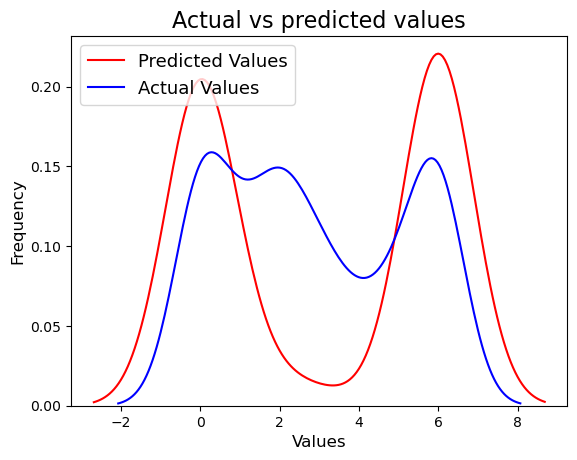

In [34]:
def grid_search_ml(features,target):

    param_grid = {
        'C': [0.1, 1, 10, 100],             # Paramètre de régularisation
        'gamma': [1, 0.1, 0.01, 0.001],     # Coefficient du noyau pour 'rbf', 'poly' et 'sigmoid'
        'kernel': ['rbf', 'poly', 'sigmoid'] # Type de noyau
    }

    # Créer un modèle de base
    dt = SVC()

    # Instancier GridSearchCV
    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    # Exécuter la recherche
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs paramètres
    print("Meilleurs paramètres : ", grid_search.best_params_)

    # Évaluer le meilleur modèle trouvé
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    

    


    sns.distplot(y_pred,hist=False,color='r',label = 'Predicted Values')
    sns.distplot(y_test,hist=False,color='b',label = 'Actual Values')
    plt.title('Actual vs predicted values',fontsize =16)
    plt.xlabel('Values',fontsize=12)
    plt.ylabel('Frequency',fontsize =12)
    plt.legend(loc='upper left',fontsize=13)
    plt.show()


grid_search_ml(features,target)

After several applications this does not result in better precision.

After reflection we concluded that the dataset did not have enough data for an output of 7 possibilities. We therefore decided to add two main things. The first is the use of almost all the columns in input, this will allow us to have new data for the algorithm that will be able to find links between the drugs that the person has already consumed to find a link with the drugs that we give him to study. We also reduced the response to whether or not the person has consumed or will ever consume this drug. This reduces the research of the model.

So here is the modification made on the dataset:

In [35]:
def prepare_dataset_for_drug_prediction(dataframe, drug_name):
    
    # Copying the dataframe to avoid modifying the original data
    df = dataframe.copy()

    # Check if the drug name is in the dataframe
    if drug_name not in df.columns:
        raise ValueError(f"The drug '{drug_name}' is not found in the dataframe.")


    df['Target'] = df[drug_name].apply(lambda x: 1 if x > 0 else 0)

    # Removing the original drug column
    df.drop(drug_name, axis=1, inplace=True)

    return df

# Preparing the dataset for the prediction of cannabis consumption
data_cannabis = prepare_dataset_for_drug_prediction(data, 'Consommation de cannabis')
data_cannabis.head(5)


Age    Genre  Education     Pays   Ethnie  Neuroticisme  Extraversion  \
ID                                                                              
2  -0.07854 -0.48246    1.98437  0.96082 -0.31685      -0.67825       1.93886   
3   0.49788 -0.48246   -0.05921  0.96082 -0.31685      -0.46725       0.80523   
4  -0.95197  0.48246    1.16365  0.96082 -0.31685      -0.14882      -0.80615   
5   0.49788  0.48246    1.98437  0.96082 -0.31685       0.73545      -1.63340   
6   2.59171  0.48246   -1.22751  0.24923 -0.31685      -0.67825      -0.30033   

    Ouverture à l'expérience  Amicalité  Conscience  ...  \
ID                                                   ...   
2                    1.43533    0.76096    -0.14277  ...   
3                   -0.84732   -1.62090    -1.01450  ...   
4                   -0.01928    0.59042     0.58489  ...   
5                   -0.45174   -0.30172     1.30612  ...   
6                   -1.55521    2.03972     1.63088  ...   

    Consommation d'héroïne  Consommation de ketamine  \
ID                                                     
2                        0                         2   
3                        0                         0   
4                        0                         2   
5                        0                         0   
6                        0                         0   

    Consommation de drogues légales  Consommation de LSD  \
ID                                                         
2                                 0                    2   
3                                 0                    0   
4                                 0                    0   
5                                 1                    0   
6                                 0                    0   

    Consommation de meth  Consommation de champignons magiques  \
ID                                                               
2                      3                                     0   
3                      0                                     1   
4                      0                                     0   
5                      0                                     2   
6                      0                                     0   

    Consommation de nicotine  Consommation de Semeron  Consommation de VSA  \
ID                                                                           
2                          4                        0                    0   
3                          0                        0                    0   
4                          2                        0                    0   
5                          2                        0                    0   
6                          6                        0                    0   

    Target  
ID          
2        1  
3        1  
4        1  
5        1  
6        0  

[5 rows x 31 columns]

We reused the code to visualize all the given models.

 Support Vector Machines statistique :
Accuracy: 89.92%
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        84
           1       0.95      0.91      0.93       293

    accuracy                           0.90       377
   macro avg       0.85      0.88      0.86       377
weighted avg       0.91      0.90      0.90       377



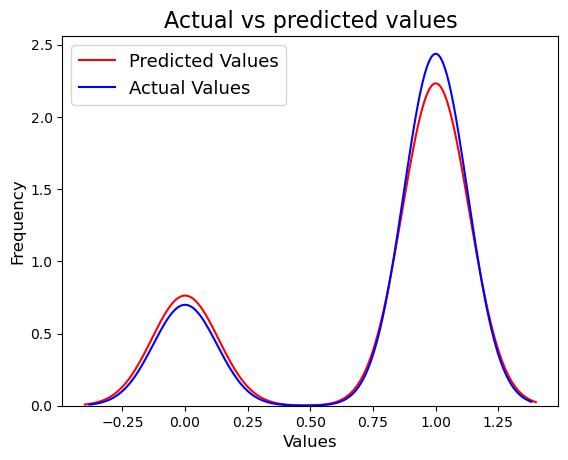

 Decision Tree Classifier statistique :
Accuracy: 83.02%
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        84
           1       0.88      0.90      0.89       293

    accuracy                           0.83       377
   macro avg       0.76      0.74      0.75       377
weighted avg       0.82      0.83      0.83       377



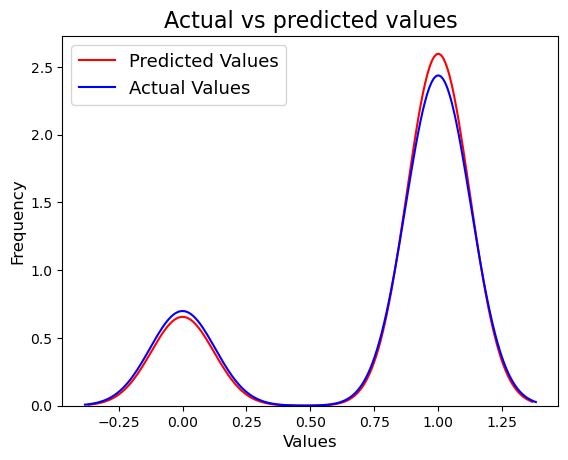

Random Forest Classifier statistique :
Accuracy: 87.80%
              precision    recall  f1-score   support

           0       0.76      0.65      0.71        84
           1       0.90      0.94      0.92       293

    accuracy                           0.88       377
   macro avg       0.83      0.80      0.81       377
weighted avg       0.87      0.88      0.87       377



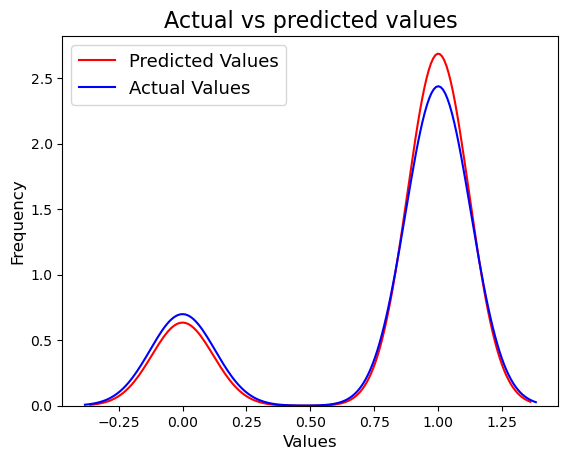

In [36]:
features_cannabis = data_cannabis.drop(["Target","Consommation de Semeron"], axis=1)
target_cannabis = data_cannabis['Target']

for name, model in models.items():
    print(name + ' statistique :')
    prediction_training(features_cannabis,target_cannabis,model)

We then obtain a precision of almost 90% for the SVM.

# Creation of our data-set

First we open the fill and convert it to our new data_set

In [37]:
fichier_data = 'data_final.csv'
data_final = pd.read_csv(fichier_data, delimiter=',', header=0)
data_final.head(3)
droppable=["Consommation","Consommation de cannabis","Consommation de Semeron"]
data_final.drop(droppable, axis=1, inplace=True)
nouvel_ordre = ['Age', 'Genre', 'Education', 'Pays', 'Ethnie', 'Neuroticisme',
       'Extraversion', "Ouverture à l'expérience", 'Amicalité', 'Conscience',
       'Impulsivité', 'Recherche de sensations', "Consommation d'alcool",
       "Consommation d'amphétamines", "Consommation d'amyl",
       'Consommation de benzodiazepine', 'Consommation de café',
       'Consommation de chocolat', 'Consommation de cocaïne',
       'Consommation de crack', "Consommation d'ecstasy",
       "Consommation d'héroïne", "Consommation de ketamine",
       'Consommation de drogues légales', 'Consommation de LSD',
       'Consommation de meth', 'Consommation de champignons magiques',
       'Consommation de nicotine', 'Consommation de VSA']
data_final=data_final[nouvel_ordre]
data_final = data_final.replace([np.inf, -np.inf], np.finfo('float64').max)
data_final.index.name="ID"
data_final = data_final.fillna(0)



In [38]:
def prediction_training_f(features,target,model):
    
    # Séparation en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

    # Création et entraînement du modèle
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    
    # Autres métriques de performance
    report = classification_report(y_test, y_pred)
    print(report)
    
    
    sns.distplot(y_pred,hist=False,color='r',label = 'Predicted Values')
    sns.distplot(y_test,hist=False,color='b',label = 'Actual Values')
    plt.title('Actual vs predicted values',fontsize =16)
    plt.xlabel('Values',fontsize=12)
    plt.ylabel('Frequency',fontsize =12)
    plt.legend(loc='upper left',fontsize=13)
    plt.show()
    return model

    


Accuracy: 88.36%
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        42
           1       0.92      0.93      0.93       147

    accuracy                           0.88       189
   macro avg       0.83      0.82      0.83       189
weighted avg       0.88      0.88      0.88       189



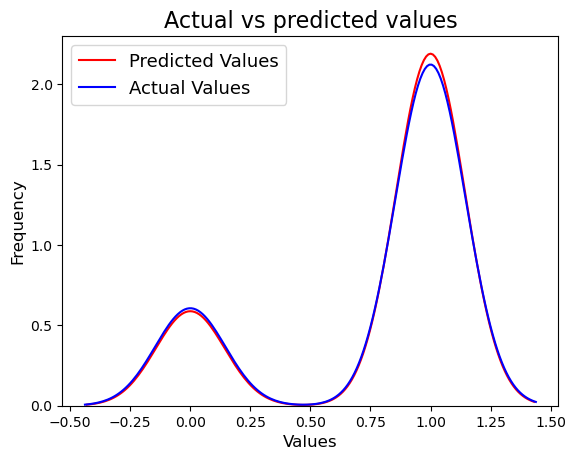

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0]


In [39]:
features_cannabis = data_cannabis.drop(["Target","Consommation de Semeron"], axis=1)
target_cannabis = data_cannabis['Target']

model_train=prediction_training_f(features_cannabis,target_cannabis,model)
print(model_train.predict(data_final))

In [40]:
print(data.columns)

Index(['Age', 'Genre', 'Education', 'Pays', 'Ethnie', 'Neuroticisme',
       'Extraversion', 'Ouverture à l'expérience', 'Amicalité', 'Conscience',
       'Impulsivité', 'Recherche de sensations', 'Consommation d'alcool',
       'Consommation d'amphétamines', 'Consommation d'amyl',
       'Consommation de benzodiazepine', 'Consommation de café',
       'Consommation de cannabis', 'Consommation de chocolat',
       'Consommation de cocaïne', 'Consommation de crack',
       'Consommation d'ecstasy', 'Consommation d'héroïne',
       'Consommation de ketamine', 'Consommation de drogues légales',
       'Consommation de LSD', 'Consommation de meth',
       'Consommation de champignons magiques', 'Consommation de nicotine',
       'Consommation de Semeron', 'Consommation de VSA'],
      dtype='object')
